## PG DS - Data Science Capstone Project -  Real Estate

### DESCRIPTION

- A banking institution requires actionable insights into mortgage-backed securities, geographic business investment, and real estate analysis. 
- The mortgage bank would like to identify potential monthly mortgage expenses for each region based on monthly family income and rental of the real estate.
- A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies.
- The dashboard must demonstrate relationships and trends for the key metrics as follows: number of loans, average rental income, monthly mortgage and owner’s cost, family income vs mortgage cost comparison across different regions. The metrics described here do not limit the dashboard to these few.


#### Dataset Description 

#### Variables
- Second mortgage : Households with a second mortgage statistics
- Home equity : Households with a home equity loan statistics
- Debt	: Households with any type of debt statistics
- Mortgage Costs : Statistics regarding mortgage payments, home equity loans, utilities, and property taxes
- Home Owner Costs : Sum of utilities, and property taxes statistics
- Gross Rent : Contract rent plus the estimated average monthly cost of utility features
- High school Graduation : High school graduation statistics
- Population Demographics : Population demographics statistics
- Age Demographics : Age demographic statistics
- Household Income : Total income of people residing in the household
- Family Income : Total income of people related to the householder

### Project Task: Week 1

#### Data Import and Preparation:

* Import data. 

* Figure out the primary key and look for the requirement of indexing.

* Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

#### Exploratory Data Analysis (EDA):

* Perform debt analysis. You may take the following steps:

- Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

- Use the following bad debt equation:

* **Bad Debt = P (Second Mortgage ∩ Home Equity Loan)**
* **Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage**
* Create pie charts  to show overall debt and bad debt

- Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

- Create a collated income distribution chart for family income, house hold income, and remaining income

- Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements): 

- Use pop and ALand variables to create a new field called population density

- Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age

- Visualize the findings using appropriate chart type

- Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

- Analyze the married, separated, and divorced population for these population brackets

- Visualize using appropriate chart type

- Please detail your observations for rent as a percentage of income at an overall level, and for different states.

- Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

###  Data Import and Preparation

**Import necessary libraries**

In [4]:
import pandas as pd
import numpy as np


#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', color_codes=True)
%matplotlib inline
#Importing necessary libraries for plotting geo map using plotly library
import plotly.express as px
#Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance.
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

#Libraries for factor analysis
from factor_analyzer.factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score

#### Import the train and test dataset

In [6]:
df_train = pd.read_csv('train_realestate.csv')
df_test = pd.read_csv('test_realestate.csv')

In [7]:
#View the fist few records from train dataset
df_train.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type  ... female_age_mean  female_age_median  \
0    Hamilton        Hamilton   City  ...        44.48629           45.33333   
1  South Bend        Roseland   City  ...        36.48391           37.58333   
2    Danville        Danville   City  ...        42.15810           42.83333   
3    San Juan        Guaynabo  Urban  ...        47.77526           50.58333   
4   Manhattan  Manhattan City   City  ...        24.17693           21.58333   

   female_age_stdev  female_age_sample_weight  female_age_samples  pct_own  \
0          22.51276                 685.33845              2618.0  0.79046   
1          23.43353                 267.23367              1284.0  0.52483   
2          23.94119                 707.01963              3238.0  0.85331   
3          24.32015                 362.20193              1559.0  0.65037   
4          11.10484                1854.48652              3051.0  0.13046   

   married  married_snp  separated  divorced  
0  0.57851      0.01882    0.01240   0.08770  
1  0.34886      0.01426    0.01426   0.09030  
2  0.64745      0.02830    0.01607   0.10657  
3  0.47257      0.02021    0.02021   0.10106  
4  0.12356      0.00000    0.00000   0.03109  

[5 rows x 80 columns]

In [8]:
#View the fist few records from test dataset
df_test.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0  255504      NaN       140       163       26      Michigan       MI   
1  252676      NaN       140         1       23         Maine       ME   
2  276314      NaN       140        15       42  Pennsylvania       PA   
3  248614      NaN       140       231       21      Kentucky       KY   
4  286865      NaN       140       355       48         Texas       TX   

             city                  place     type  ... female_age_mean  \
0         Detroit  Dearborn Heights City      CDP  ...        34.78682   
1          Auburn            Auburn City     City  ...        44.23451   
2       Pine City              Millerton  Borough  ...        41.62426   
3      Monticello        Monticello City     City  ...        44.81200   
4  Corpus Christi                  Edroy     Town  ...        40.66618   

   female_age_median  female_age_stdev  female_age_sample_weight  \
0           33.75000          21.58531                 416.48097   
1           46.66667          22.37036                 532.03505   
2           44.50000          22.86213                 453.11959   
3           48.00000          21.03155                 263.94320   
4           42.66667          21.30900                 709.90829   

   female_age_samples  pct_own  married  married_snp  separated  divorced  
0              1938.0  0.70252  0.28217      0.05910    0.03813   0.14299  
1              1950.0  0.85128  0.64221      0.02338    0.00000   0.13377  
2              1879.0  0.81897  0.59961      0.01746    0.01358   0.10026  
3              1081.0  0.84609  0.56953      0.05492    0.04694   0.12489  
4              2956.0  0.79077  0.57620      0.01726    0.00588   0.16379  

[5 rows x 80 columns]

In [9]:
#Print the shape and size of train and test dataset
print('Train dataset shape:',df_train.shape)
print('Train dataset no.of elements in a dataframe: ', df_train.size)
print('')
print('Test dataset shape:',df_test.shape)
print('Test dataset no.of elements in a dataframe: ', df_test.size)

Train dataset shape: (27321, 80)
Train dataset no.of elements in a dataframe:  2185680

Test dataset shape: (11709, 80)
Test dataset no.of elements in a dataframe:  936720


In [10]:
#Concise summary of train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [11]:
#Concise summary of test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

#### Figure out the primary key and look for the requirement of indexing.

#### Note:
* The feature 'UID' is The ID of the location of which we are analyzing and hence an index can be created from 'UID' feature.Set the dataframe index for both train and test dataset using UID

In [14]:
df_train.set_index(keys=['UID'], inplace=True)
df_test.set_index(keys=['UID'], inplace=True)

In [15]:
#Let's check first 3 records after index set
df_train.head(3)

BLOCKID  SUMLEVEL  COUNTYID  STATEID     state state_ab        city  \
UID                                                                           
267822      NaN       140        53       36  New York       NY    Hamilton   
246444      NaN       140       141       18   Indiana       IN  South Bend   
245683      NaN       140        63       18   Indiana       IN    Danville   

           place  type primary  ...  female_age_mean  female_age_median  \
UID                             ...                                       
267822  Hamilton  City   tract  ...         44.48629           45.33333   
246444  Roseland  City   tract  ...         36.48391           37.58333   
245683  Danville  City   tract  ...         42.15810           42.83333   

        female_age_stdev  female_age_sample_weight  female_age_samples  \
UID                                                                      
267822          22.51276                 685.33845              2618.0   
246444          23.43353                 267.23367              1284.0   
245683          23.94119                 707.01963              3238.0   

        pct_own  married  married_snp  separated  divorced  
UID                                                         
267822  0.79046  0.57851      0.01882    0.01240   0.08770  
246444  0.52483  0.34886      0.01426    0.01426   0.09030  
245683  0.85331  0.64745      0.02830    0.01607   0.10657  

[3 rows x 79 columns]

In [16]:
#Let's check first 3 records after index set
df_test.head(3)

BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
UID                                                                   
255504      NaN       140       163       26      Michigan       MI   
252676      NaN       140         1       23         Maine       ME   
276314      NaN       140        15       42  Pennsylvania       PA   

             city                  place     type primary  ...  \
UID                                                        ...   
255504    Detroit  Dearborn Heights City      CDP   tract  ...   
252676     Auburn            Auburn City     City   tract  ...   
276314  Pine City              Millerton  Borough   tract  ...   

        female_age_mean  female_age_median  female_age_stdev  \
UID                                                            
255504         34.78682           33.75000          21.58531   
252676         44.23451           46.66667          22.37036   
276314         41.62426           44.50000          22.86213   

        female_age_sample_weight  female_age_samples  pct_own  married  \
UID                                                                      
255504                 416.48097              1938.0  0.70252  0.28217   
252676                 532.03505              1950.0  0.85128  0.64221   
276314                 453.11959              1879.0  0.81897  0.59961   

        married_snp  separated  divorced  
UID                                       
255504      0.05910    0.03813   0.14299  
252676      0.02338    0.00000   0.13377  
276314      0.01746    0.01358   0.10026  

[3 rows x 79 columns]

#### Missing value task:- Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [17]:
#Let's check for missing values in train dataset
df_train.isna().sum()

BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
state              0
               ...  
pct_own          268
married          191
married_snp      191
separated        191
divorced         191
Length: 79, dtype: int64

In [18]:
df_train.isna().any().value_counts()

True     59
False    20
dtype: int64

In [19]:
#Let's check for missing values in train dataset
df_test.isna().sum()

BLOCKID        11709
SUMLEVEL           0
COUNTYID           0
STATEID            0
state              0
               ...  
pct_own          122
married           84
married_snp       84
separated         84
divorced          84
Length: 79, dtype: int64

In [20]:
df_test.isna().any().value_counts()

True     59
False    20
dtype: int64

In [21]:
#Percentage of missing values in a train dataset
df_train_miss_vals = df_train.isnull().sum() *100/ len(df_train)
df_train_miss_vals

BLOCKID        100.000000
SUMLEVEL         0.000000
COUNTYID         0.000000
STATEID          0.000000
state            0.000000
                  ...    
pct_own          0.980930
married          0.699096
married_snp      0.699096
separated        0.699096
divorced         0.699096
Length: 79, dtype: float64

In [22]:
missing_vals_df_train = pd.DataFrame(df_train_miss_vals,columns=['Percentage of missing values_trainData'])
missing_vals_df_train.sort_values(by=['Percentage of missing values_trainData'], inplace=True,ascending=False)

#Print the first 10 records with percentage of missing values greater than 0
missing_vals_df_train[missing_vals_df_train>0][:10]

Percentage of missing values_trainData
BLOCKID                                                100.000000
hc_samples                                               2.196113
hc_mean                                                  2.196113
hc_median                                                2.196113
hc_stdev                                                 2.196113
hc_sample_weight                                         2.196113
hc_mortgage_mean                                         2.097288
hc_mortgage_stdev                                        2.097288
hc_mortgage_sample_weight                                2.097288
hc_mortgage_samples                                      2.097288

In [23]:
#Calculate the percentage of missing values in test dataset
miss_vals_df_test = (df_test.isnull().sum() *100) / len(df_test)
missing_val_test_pd = pd.DataFrame(miss_vals_df_test, columns=['Percentage of missing values_testData'])
missing_val_test_pd.sort_values(by=['Percentage of missing values_testData'],inplace=True, ascending=False)

#Print the first 10 records with percentage of missing values greater than 0
missing_val_test_pd[missing_val_test_pd > 0][:10]

Percentage of missing values_testData
BLOCKID                                               100.000000
hc_samples                                              2.476727
hc_mean                                                 2.476727
hc_median                                               2.476727
hc_stdev                                                2.476727
hc_sample_weight                                        2.476727
hc_mortgage_mean                                        2.288838
hc_mortgage_stdev                                       2.288838
hc_mortgage_sample_weight                               2.288838
hc_mortgage_samples                                     2.288838

### Note:
* 'BLOCKID' variable has 100% null values hence can be dropped.
* 'SUMLEVEL' variable has all the values that are same hence no variance, can be dropped.
* 'PRIMARY' variable defines the location as only tract, of type object and not of much use for further analysis, can be dropped.

In [25]:
#Drop the two variables BLOCKID and SUMLEVEL
df_train.drop(columns=['BLOCKID','SUMLEVEL','primary'],inplace=True)
df_test.drop(columns=['BLOCKID','SUMLEVEL','primary'],inplace=True)

#### Duplicate values check

In [26]:
print('No.of duplicates in train dataset:\n',df_train.duplicated().value_counts())
print('')
print('No.of duplicates in test dataset:\n',df_test.duplicated().value_counts())

No.of duplicates in train dataset:
 False    27161
True       160
dtype: int64

No.of duplicates in test dataset:
 False    11677
True        32
dtype: int64


In [27]:
#Dropping the duplicates while keeping the fisrt value
df_train.drop_duplicates(keep='first', inplace=True)
df_test.drop_duplicates(keep='first',inplace=True)

In [28]:
df_train.duplicated().value_counts()

False    27161
dtype: int64

In [29]:
print(df_train.shape)
print(df_test.shape)

(27161, 76)
(11677, 76)


#### Descriptive Statistical analysis Train dataset

In [30]:
#Statistical summary for all numeric columns for train data
df_train.describe()

COUNTYID       STATEID      zip_code     area_code           lat  \
count  27161.000000  27161.000000  27161.000000  27161.000000  27161.000000   
mean      85.660322     28.267185  50105.133243    596.589816     37.519180   
std       98.373195     16.385918  29546.218041    232.424069      5.585968   
min        1.000000      1.000000    602.000000    201.000000     17.929085   
25%       29.000000     13.000000  26847.000000    405.000000     33.906105   
50%       63.000000     28.000000  47804.000000    614.000000     38.760645   
75%      109.000000     42.000000  77093.000000    801.000000     41.393414   
max      840.000000     72.000000  99925.000000    989.000000     67.074018   

                lng         ALand        AWater           pop      male_pop  \
count  27161.000000  2.716100e+04  2.716100e+04  27161.000000  27161.000000   
mean     -91.297136  1.300355e+08  6.542839e+06   4324.547218   2126.436950   
std       16.340783  1.277991e+09  2.193149e+08   2131.542105   1078.082819   
min     -165.453872  4.113400e+04  0.000000e+00      0.000000      0.000000   
25%      -97.819063  1.809071e+06  0.000000e+00   2895.000000   1409.000000   
50%      -86.571868  4.888017e+06  2.779500e+04   4049.000000   1981.000000   
75%      -79.802626  3.373467e+07  5.252160e+05   5435.000000   2670.000000   
max      -65.379332  1.040000e+11  2.453228e+10  53812.000000  27962.000000   

       ...  female_age_mean  female_age_median  female_age_stdev  \
count  ...     27000.000000       27000.000000      27000.000000   
mean   ...        40.354614          40.395275         22.213313   
std    ...         5.822023           7.985358          2.447802   
min    ...        16.008330          13.250000          0.556780   
25%    ...        36.932603          35.000000         21.324497   
50%    ...        40.389660          40.583330         22.520945   
75%    ...        43.574030          45.416670         23.579895   
max    ...        79.837390          82.250000         30.241270   

       female_age_sample_weight  female_age_samples       pct_own  \
count              27000.000000        27000.000000  26954.000000   
mean                 544.289544         2211.217519      0.642269   
std                  280.681202         1083.432414      0.224184   
min                    0.664700            2.000000      0.000000   
25%                  356.481745         1474.000000      0.505040   
50%                  503.969830         2068.000000      0.691585   
75%                  680.324678         2774.000000      0.817673   
max                 6197.995200        27250.000000      1.000000   

            married   married_snp     separated      divorced  
count  27011.000000  27011.000000  27011.000000  27011.000000  
mean       0.509312      0.047344      0.019073      0.100385  
std        0.135701      0.037156      0.020744      0.048808  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.426550      0.020825      0.004555      0.066015  
50%        0.527230      0.038770      0.013460      0.095330  
75%        0.606055      0.064895      0.027460      0.129030  
max        1.000000      0.714290      0.714290      1.000000  

[8 rows x 71 columns]

In [31]:
#Statistical summary for all object variables train dataset
df_train.describe(include=[object])

state state_ab     city          place   type
count        27161    27161    27161          27161  27161
unique          52       52     6916           9912      6
top     California       CA  Chicago  New York City   City
freq          2905     2905      292            480  15137

In [32]:
#Statistical Analysis for test dataset
df_test.describe()

COUNTYID       STATEID      zip_code     area_code           lat  \
count  11677.000000  11677.000000  11677.000000  11677.000000  11677.000000   
mean      85.810054     28.481459  50136.617796    593.626103     37.404823   
std       99.395979     16.609621  29762.242840    232.054490      5.626697   
min        1.000000      1.000000    601.000000    201.000000     17.965835   
25%       29.000000     13.000000  25701.000000    404.000000     33.916899   
50%       61.000000     28.000000  47371.000000    612.000000     38.617819   
75%      109.000000     42.000000  77388.000000    787.000000     41.233149   
max      810.000000     72.000000  99929.000000    989.000000     64.804269   

                lng         ALand        AWater           pop      male_pop  \
count  11677.000000  1.167700e+04  1.167700e+04  11677.000000  11677.000000   
mean     -91.342375  1.087706e+08  5.165436e+06   4372.098827   2154.862636   
std       16.402506  7.570166e+08  1.524731e+08   2119.148500   1085.525442   
min     -166.770979  8.299000e+03  0.000000e+00      0.000000      0.000000   
25%      -97.805299  1.721296e+06  0.000000e+00   2940.000000   1435.000000   
50%      -86.658629  4.845509e+06  2.281800e+04   4120.000000   2011.000000   
75%      -79.723197  3.211049e+07  4.864500e+05   5475.000000   2690.000000   
max      -65.695344  5.520166e+10  1.212570e+10  39454.000000  27962.000000   

       ...  female_age_mean  female_age_median  female_age_stdev  \
count  ...     11590.000000       11590.000000      11590.000000   
mean   ...        40.128878          40.152660         22.160832   
std    ...         5.820675           7.952149          2.521395   
min    ...        15.360240          12.833330          0.737110   
25%    ...        36.750570          34.750000         21.277995   
50%    ...        40.203245          40.333330         22.474795   
75%    ...        43.499500          45.333330         23.549955   
max    ...        90.107940          90.166670         29.626680   

       female_age_sample_weight  female_age_samples       pct_own  \
count              11590.000000        11590.000000  11565.000000   
mean                 550.062635         2233.879810      0.634921   
std                  279.148294         1071.479442      0.231238   
min                    0.251910            3.000000      0.000000   
25%                  363.394600         1501.000000      0.493490   
50%                  509.139220         2099.500000      0.687910   
75%                  685.694577         2800.000000      0.815350   
max                 4145.557870        15466.000000      1.000000   

            married   married_snp     separated      divorced  
count  11600.000000  11600.000000  11600.000000  11600.000000  
mean       0.506016      0.047903      0.019342      0.099274  
std        0.139175      0.038573      0.021414      0.048441  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.422563      0.020890      0.004500      0.064687  
50%        0.525505      0.038670      0.013870      0.094435  
75%        0.605672      0.065285      0.027910      0.128412  
max        1.000000      0.714290      0.714290      0.362750  

[8 rows x 71 columns]

In [33]:
#Statistical summary for all object variables in test dataset
df_test.describe(include=['object'])

state state_ab      city          place   type
count        11677    11677     11677          11677  11677
unique          52       52      4369           5902      6
top     California       CA  Brooklyn  New York City   City
freq          1263     1263       134            223   6460

#### Missing value treatment
* From the descriptive analysis we observe that for majority of features mean is greater than medium indicating distribution is positively skewed(indication of outliers).
* As mean is highly sensitivie to outliers as comapred to median which is more robust with the presence of outliers,We employ 'median' as a missing value treatment.

In [34]:
#Train Dataset--Run a for loop and fillna() method to impute missing values with median
for i in df_train.columns:
    counts = df_train[i].count()
    if counts < len(df_train):
        df_train[i].fillna(df_train[i].median(), inplace=True)

In [35]:
#Check for missing values in train dataset
df_train.isna().any().sum()

0

In [36]:
#Test Dataset--Run a for loop and fillna() method to impute missing values with median
for i in df_test.columns:
    counts1 = df_test[i].count()
    if counts1 < len(df_test):
        df_test[i].fillna(df_test[i].median(),inplace=True)

In [37]:
#Check for missing values in test dataset
df_test.isna().any().sum()

0

In [38]:
print(df_train.shape)
print(df_test.shape)

(27161, 76)
(11677, 76)


### <font color='black'>Exploratory Data Analysis</font>

### <font color='blue'>**4.Perform debt analysis. You may take the following steps:**</font>

<font color='olive'> **4.a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent**</font>

<AxesSubplot:xlabel='second_mortgage', ylabel='Count'>

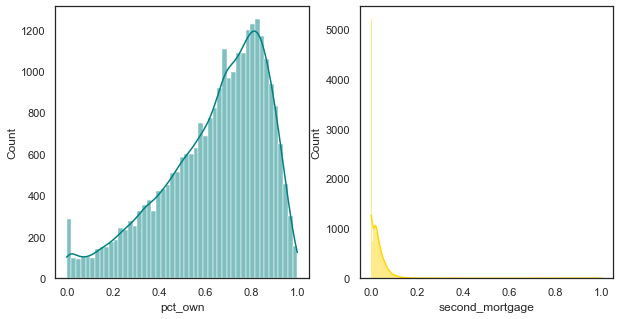

In [39]:
#let's check the distribution of these 2 variables second_mortgage and pct_pwn
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.histplot(data=df_train, x='pct_own', color='teal', kde=True,ax=ax[0])
sns.histplot(data=df_train, x='second_mortgage', color='gold', kde=True,ax=ax[1])

* **From the above distribution, we can infer that pc_own is lille left skewed but the distribution grows significantly above 10%. For second_mortgage the distribution is left skewed and and major % of houses with second mortgage are lesser than 20% but it ha extended till 90% with very little observations.**

In [40]:
top_2500 = df_train[df_train['pct_own'] > 0.1]

In [41]:
top_2500.shape

(26486, 76)

In [42]:
#From the above resultant dataframe of top 2500, fetch the observations 
top_2500 = top_2500[top_2500['second_mortgage'] <= 0.5]

In [43]:
#From the dataframe of top_2500 fetch only top 2500 records using nlargest(returns the first n rows ordered by columns in descending order)
top_2500 = top_2500.nlargest(2500,columns='second_mortgage')

In [44]:
top_2500.shape

(2500, 76)

In [45]:
#Display first few records of top_2500 dataframe with few columns of importance based on further analysis
cols = ['COUNTYID','STATEID','state','lat','lng','city','place', 'pop','hi_median', 'family_median', 'hc_median', 'home_equity_second_mortgage','second_mortgage', 
 'home_equity', 'debt', 'hs_degree','male_age_median', 'female_age_median','pct_own', 'married','married_snp', 
 'separated', 'divorced']
top_2500 = top_2500[cols]
top_2500.head()

COUNTYID  STATEID          state        lat        lng         city  \
UID                                                                           
289712       147       51       Virginia  37.297357 -78.396452    Farmville   
251185        27       25  Massachusetts  42.254262 -71.800347    Worcester   
269323        81       36       New York  40.751809 -73.853582       Corona   
251324         3       24       Maryland  39.127273 -76.635265  Glen Burnie   
235788        57       12        Florida  28.029063 -82.495395        Tampa   

                  place   pop  hi_median  family_median  ...  home_equity  \
UID                                                      ...                
289712        Farmville  1733    23236.0        59954.0  ...      0.00000   
251185   Worcester City  2133    29037.0        40476.0  ...      0.43363   
269323     Harbor Hills  4181    46106.0        40462.0  ...      0.40341   
251324      Glen Burnie  4866    50164.0        50705.0  ...      0.35689   
235788  Egypt Lake-leto  5468    38340.0        39980.0  ...      0.38785   

           debt  hs_degree  male_age_median  female_age_median  pct_own  \
UID                                                                       
289712  0.50000    1.00000         19.25000           19.16667  0.62069   
251185  0.84956    0.71803         30.75000           26.16667  0.20247   
269323  0.78409    0.58739         29.58333           27.66667  0.15618   
251324  0.87633    0.86185         27.41667           30.66667  0.22380   
235788  0.78972    0.92809         29.08333           28.58333  0.11618   

        married  married_snp  separated  divorced  
UID                                                
289712  0.03612      0.01806    0.01806   0.00000  
251185  0.37844      0.11976    0.09341   0.10539  
269323  0.44490      0.14555    0.02357   0.04066  
251324  0.58250      0.08321    0.00000   0.01778  
235788  0.36953      0.12876    0.09957   0.07339  

[5 rows x 23 columns]

### Visualize using geo-map with plotly library

In [46]:
fig = go.Figure(data = go.Scattergeo(lat = top_2500['lat'],
                                    lon = top_2500['lng'],
                            ))
fig.update_layout(
    geo=dict(
        scope = 'north america',
        showland = True,
        landcolor = 'rgb(212,212,212)',
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)',
        showlakes = True,
        lakecolor = 'rgb(255,255,255)',
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(type = 'conic conformal',
                         rotation_lon = -100),
        lonaxis = dict(showgrid=True, gridwidth=0.5, range=[-140.0, -55.0], dtick=5),
        lataxis = dict(showgrid=True, gridwidth=0.5, range=[20.0, 60.0], dtick = 5),
        
    ),
    title = 'Top 2500 locations with second mortgage highest and percentage of ownership is greater than 10%')
fig.show()

### <font color = 'olive'> **4.b)Use the following bad debt equation:**</font>

* Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
* Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage
* Create pie charts  to show overall debt and bad debt

In [47]:
#Overall debt and bad debt analysis
top_2500['bad_debt'] = top_2500['second_mortgage'] + top_2500['home_equity'] - top_2500['home_equity_second_mortgage']

In [48]:
#good debt 
top_2500['good_debt'] = top_2500['debt'] - top_2500['bad_debt']

In [49]:
top_2500.head()

COUNTYID  STATEID          state        lat        lng         city  \
UID                                                                           
289712       147       51       Virginia  37.297357 -78.396452    Farmville   
251185        27       25  Massachusetts  42.254262 -71.800347    Worcester   
269323        81       36       New York  40.751809 -73.853582       Corona   
251324         3       24       Maryland  39.127273 -76.635265  Glen Burnie   
235788        57       12        Florida  28.029063 -82.495395        Tampa   

                  place   pop  hi_median  family_median  ...  hs_degree  \
UID                                                      ...              
289712        Farmville  1733    23236.0        59954.0  ...    1.00000   
251185   Worcester City  2133    29037.0        40476.0  ...    0.71803   
269323     Harbor Hills  4181    46106.0        40462.0  ...    0.58739   
251324      Glen Burnie  4866    50164.0        50705.0  ...    0.86185   
235788  Egypt Lake-leto  5468    38340.0        39980.0  ...    0.92809   

        male_age_median  female_age_median  pct_own  married  married_snp  \
UID                                                                         
289712         19.25000           19.16667  0.62069  0.03612      0.01806   
251185         30.75000           26.16667  0.20247  0.37844      0.11976   
269323         29.58333           27.66667  0.15618  0.44490      0.14555   
251324         27.41667           30.66667  0.22380  0.58250      0.08321   
235788         29.08333           28.58333  0.11618  0.36953      0.12876   

        separated  divorced  bad_debt  good_debt  
UID                                               
289712    0.01806   0.00000   0.50000    0.00000  
251185    0.09341   0.10539   0.43363    0.41593  
269323    0.02357   0.04066   0.40341    0.38068  
251324    0.00000   0.01778   0.38162    0.49471  
235788    0.09957   0.07339   0.38785    0.40187  

[5 rows x 25 columns]

#### Visualization of a bad debt

In [50]:
bad_debt_viz =[round(sum(top_2500['debt']),2),round(sum(top_2500['bad_debt']),2)]
print('Overall debt is: ',bad_debt_viz[0])
print('Bad debt:',bad_debt_viz[1])

Overall debt is:  1842.59
Bad debt: 447.09


Text(0.5, 1.0, 'Overall Debt vs Bad Debt')

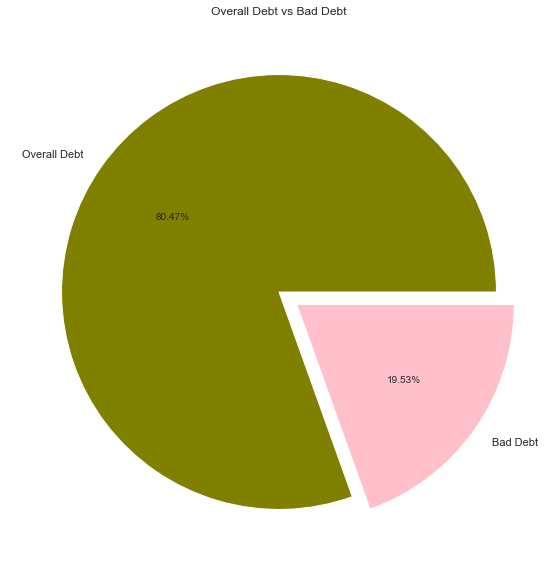

In [51]:
fig = plt.figure(figsize=(20,10))
plt.pie(bad_debt_viz, labels=['Overall Debt','Bad Debt'], autopct='%1.2f%%',explode=(0,0.1), colors=['olive','pink'])
plt.title('Overall Debt vs Bad Debt')

### <font color='olive'>4.c)Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities</font>

<font color='teal'>**Box and whisker plot of second mortgage for different citites**</font>

In [52]:
cities = top_2500.city.unique()[1:16]
df = top_2500[top_2500['city'].isin(cities)]

### Boxplot for City vs Second Mortgage

Text(0, 0.5, 'Second Mortgage')

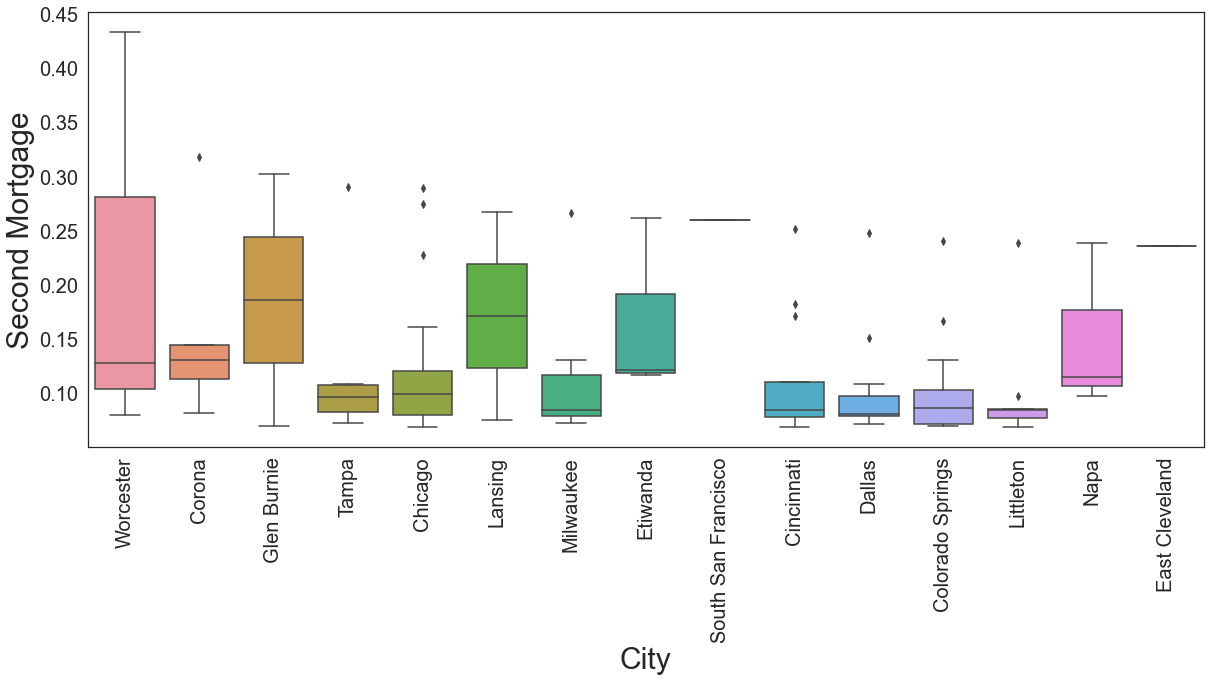

In [53]:
#City vs Second Mortgage
plt.figure(figsize = (20, 8))
sns.boxplot(x=df['city'], y=df['second_mortgage'])
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('City', fontsize=30)
plt.ylabel('Second Mortgage', fontsize=30)

### Boxplot for City vs Home Equity

Text(0, 0.5, 'Home Equity')

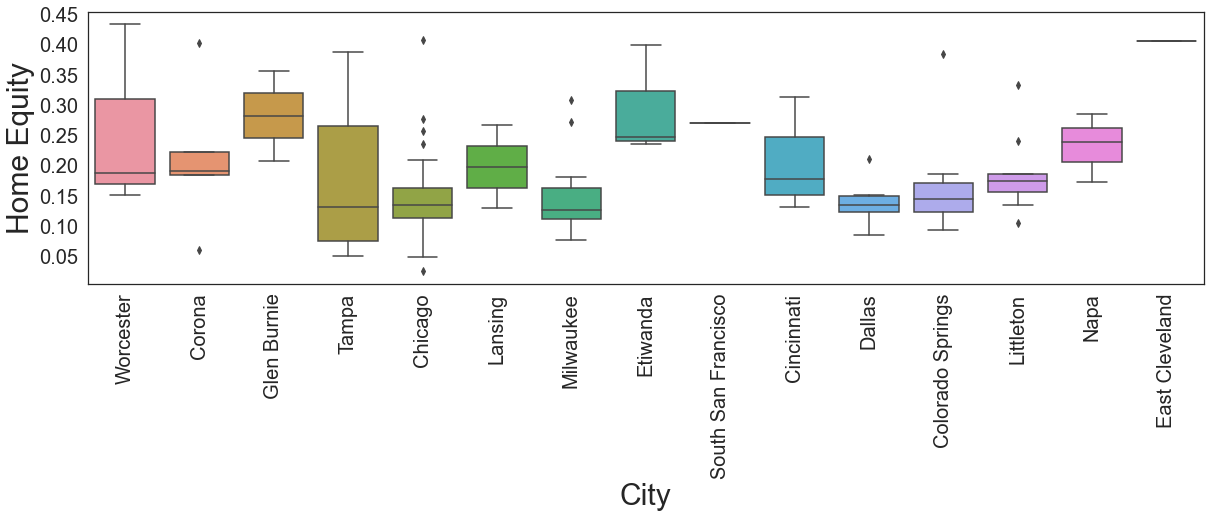

In [54]:
#City Vs Home Equity
plt.figure(figsize = (20, 5))
sns.boxplot(x=df['city'], y=df['home_equity'])
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('City', fontsize=30)
plt.ylabel('Home Equity', fontsize=30)

### Boxplot for City vs Good Debt

Text(0, 0.5, 'Good debt')

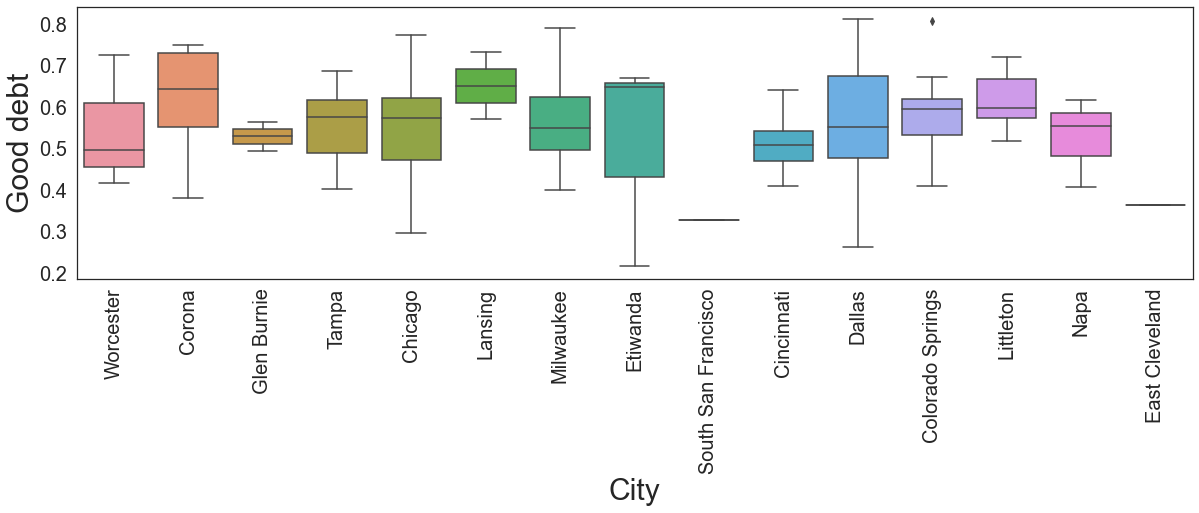

In [55]:
#City vs Good Debt
plt.figure(figsize = (20, 5))
sns.boxplot(x=df['city'], y=df['good_debt'])
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('City', fontsize=30)
plt.ylabel('Good debt', fontsize=30)

### Boxplot for City vs Bad Debt

Text(0, 0.5, 'Bad_Debt')

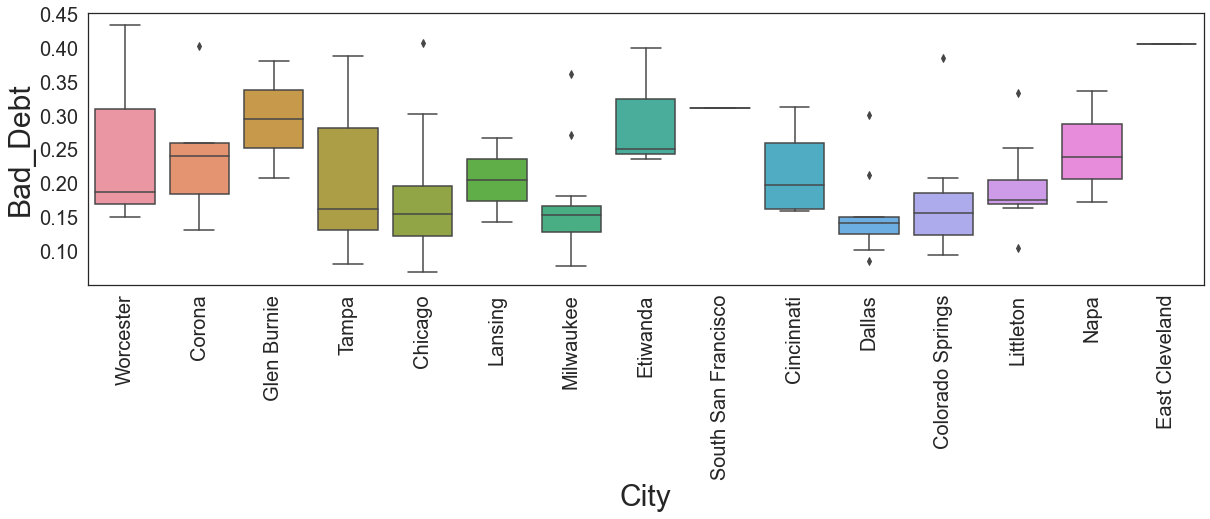

In [56]:
#City vs Bad Debt
plt.figure(figsize = (20, 5))
sns.boxplot(x=df['city'], y=df['bad_debt'])
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('City', fontsize=30)
plt.ylabel('Bad_Debt', fontsize=30)

### <font color = 'olive'>4.d)Create a collated income distribution chart for family income, house hold income, and remaining income</font>

In [57]:
top_2500['remaining_income'] = top_2500['family_median'] - top_2500['hi_median']
top_2500.head(4)

COUNTYID  STATEID          state        lat        lng         city  \
UID                                                                           
289712       147       51       Virginia  37.297357 -78.396452    Farmville   
251185        27       25  Massachusetts  42.254262 -71.800347    Worcester   
269323        81       36       New York  40.751809 -73.853582       Corona   
251324         3       24       Maryland  39.127273 -76.635265  Glen Burnie   

                 place   pop  hi_median  family_median  ...  male_age_median  \
UID                                                     ...                    
289712       Farmville  1733    23236.0        59954.0  ...         19.25000   
251185  Worcester City  2133    29037.0        40476.0  ...         30.75000   
269323    Harbor Hills  4181    46106.0        40462.0  ...         29.58333   
251324     Glen Burnie  4866    50164.0        50705.0  ...         27.41667   

        female_age_median  pct_own  married  married_snp  separated  divorced  \
UID                                                                             
289712           19.16667  0.62069  0.03612      0.01806    0.01806   0.00000   
251185           26.16667  0.20247  0.37844      0.11976    0.09341   0.10539   
269323           27.66667  0.15618  0.44490      0.14555    0.02357   0.04066   
251324           30.66667  0.22380  0.58250      0.08321    0.00000   0.01778   

        bad_debt  good_debt  remaining_income  
UID                                            
289712   0.50000    0.00000           36718.0  
251185   0.43363    0.41593           11439.0  
269323   0.40341    0.38068           -5644.0  
251324   0.38162    0.49471             541.0  

[4 rows x 26 columns]

### Distribution plots of hi_median, family_median and remaining_income

<AxesSubplot:xlabel='remaining_income', ylabel='Density'>

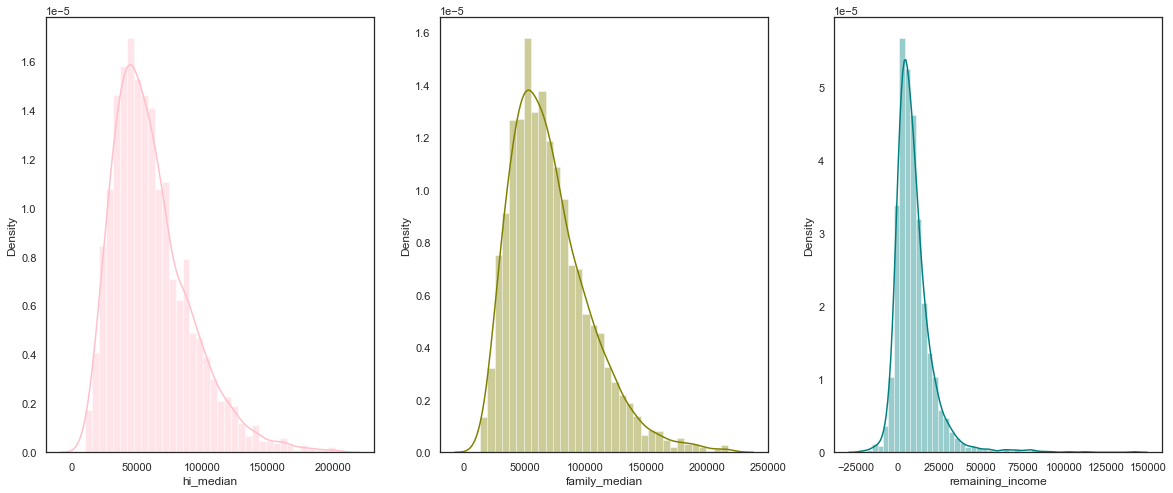

In [58]:
f, axs = plt.subplots(1, 3, figsize = (20, 8))
sns.distplot(top_2500['hi_median'],color='pink',ax=axs[0])
sns.distplot(top_2500['family_median'],color='olive',ax=axs[1])
sns.distplot(top_2500['remaining_income'],color='teal',ax=axs[2])

In [59]:
coll_income_chart = round(top_2500[['state','city','hi_median','family_median','remaining_income']], 2).sort_values(by='family_median',ascending=False)
coll_income_chart

state               city  hi_median  family_median  \
UID                                                                         
285572                 Texas            Houston   191611.0       217577.0   
233216           Connecticut           Stamford   201890.0       216883.0   
225899            California  Pacific Palisades   200097.0       216320.0   
224465            California             Orinda   175796.0       213809.0   
234109  District of Columbia         Washington    66499.0       208606.0   
...                      ...                ...        ...            ...   
260130        North Carolina      Winston Salem    14095.0        15416.0   
228932            California         Sacramento    11599.0        15236.0   
276056          Pennsylvania        Mc Keesport    15829.0        14837.0   
238745               Georgia              Macon    13182.0        14438.0   
273372                  Ohio             Canton    10737.0        13456.0   

        remaining_income  
UID                       
285572           25966.0  
233216           14993.0  
225899           16223.0  
224465           38013.0  
234109          142107.0  
...                  ...  
260130            1321.0  
228932            3637.0  
276056            -992.0  
238745            1256.0  
273372            2719.0  

[2500 rows x 5 columns]

### Boxplot to plot the collated income chart

Text(0.5, 1.0, 'Collated Income distribution')

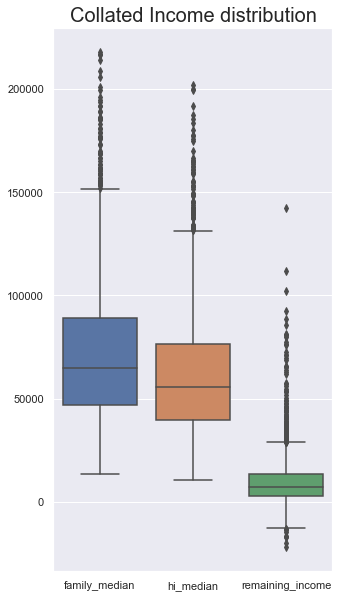

In [60]:
sns.set_style('darkgrid')
plt.figure(figsize=(5,10))
sns.boxplot(data=top_2500[['family_median','hi_median','remaining_income']], palette='deep').set_title('Collated Income distribution', fontsize=20)

**NOTE:From the above income charts we see the distribution of both household and family is positively skewed probably because some of the states in US are most educated and with best employment and more populated like Texas,California,Massachusetts,New Jersey etc. The total median family income of specified geographic location is more than median houeshold income**

### 5.Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements): 

<font color='olive'>***5.a)Use pop and ALand variables to create a new field called population density***</font>

<font color='olive'>***5.b)Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age***</font>

<font color='olive'>***5.c)Visualize the findings using appropriate chart type***</font>

In [61]:
#Let's do a population EDA/Analysis to gain some insigths into population
pop_ed = df_train.loc[:,['state','city','place','ALand','pop','male_pop','female_pop','male_age_median','female_age_median']]

In [62]:
pop_ed.head()

state        city           place        ALand   pop  male_pop  \
UID                                                                            
267822     New York    Hamilton        Hamilton  202183361.0  5230      2612   
246444      Indiana  South Bend        Roseland    1560828.0  2633      1349   
245683      Indiana    Danville        Danville   69561595.0  6881      3643   
279653  Puerto Rico    San Juan        Guaynabo    1105793.0  2700      1141   
247218       Kansas   Manhattan  Manhattan City    2554403.0  5637      2586   

        female_pop  male_age_median  female_age_median  
UID                                                     
267822        2618         44.00000           45.33333  
246444        1284         32.00000           37.58333  
245683        3238         40.83333           42.83333  
279653        1559         48.91667           50.58333  
247218        3051         22.41667           21.58333

In [63]:
pop_ed['pop_density'] = pop_ed['pop'] / pop_ed['ALand']
pop_ed['median_age'] = (pop_ed['female_age_median'] + pop_ed['male_age_median']) / 2
pop_ed.head()

state        city           place        ALand   pop  male_pop  \
UID                                                                            
267822     New York    Hamilton        Hamilton  202183361.0  5230      2612   
246444      Indiana  South Bend        Roseland    1560828.0  2633      1349   
245683      Indiana    Danville        Danville   69561595.0  6881      3643   
279653  Puerto Rico    San Juan        Guaynabo    1105793.0  2700      1141   
247218       Kansas   Manhattan  Manhattan City    2554403.0  5637      2586   

        female_pop  male_age_median  female_age_median  pop_density  \
UID                                                                   
267822        2618         44.00000           45.33333     0.000026   
246444        1284         32.00000           37.58333     0.001687   
245683        3238         40.83333           42.83333     0.000099   
279653        1559         48.91667           50.58333     0.002442   
247218        3051         22.41667           21.58333     0.002207   

        median_age  
UID                 
267822   44.666665  
246444   34.791665  
245683   41.833330  
279653   49.750000  
247218   22.000000

### <font color='olive'>View the population density and median age state wise using Bar plot distribution</font>

In [64]:
pop_den_bar_plot_df = pop_ed.groupby('state')['pop_density'].mean().reset_index()
pop_den_bar_plot_df = pop_den_bar_plot_df.sort_values(by='pop_density',ascending=False).reset_index(drop=True)
pop_den_bar_plot_df.head()

state  pop_density
0              New York     0.009404
1  District of Columbia     0.006438
2            California     0.003334
3                Hawaii     0.003253
4            New Jersey     0.003222

#### Plot the population density barplot 

Text(0, 0.5, 'Population density')

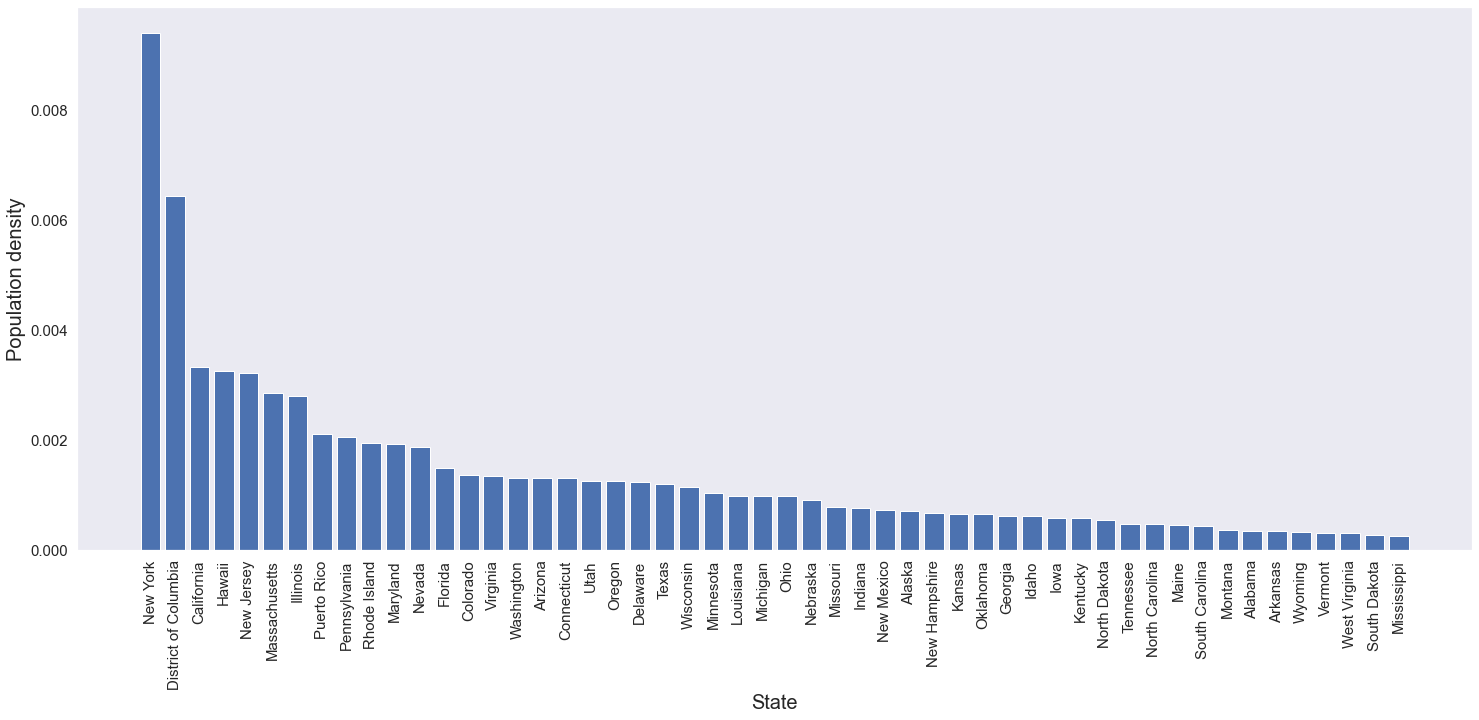

In [65]:
plt.figure(figsize=(25,10))
plt.grid(False)
plt.bar('state','pop_density', data=pop_den_bar_plot_df)
#Get or set the current tick locations and labels of the x-axis i.e state names in 90 degree angle
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('State', fontsize=20)
plt.ylabel('Population density', fontsize=20)

<AxesSubplot:xlabel='pop_density', ylabel='Density'>

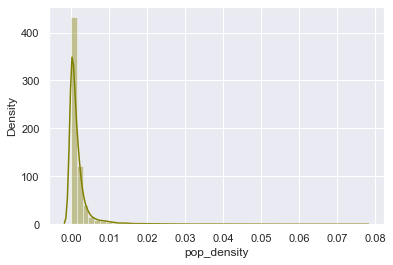

In [66]:
sns.distplot(pop_ed['pop_density'], color='olive')

#### Note: From the both the plots above for population density we observe
* Overall Population density is very less.
* New York state has the high number of individuals per unit land area indicating densely populated and higd demand for housing.
* Missisipi has lowest no of population i.e Number of inidividuals per unit area are very less.

### Plot the Age Distribution

In [67]:
median_age_bar_plot_df = pop_ed.groupby('state')['median_age'].mean().reset_index()
median_age_bar_plot_df = median_age_bar_plot_df.sort_values(by='median_age', ascending=False).reset_index(drop=True)
median_age_bar_plot_df.head(10)

state  median_age
0          Maine   44.266025
1        Vermont   44.041666
2        Florida   43.610649
3  West Virginia   43.267113
4  New Hampshire   42.114955
5        Montana   42.113194
6    Connecticut   41.180641
7         Oregon   41.020704
8       Delaware   40.988263
9   Pennsylvania   40.875684

Text(0, 0.5, 'Median_age')

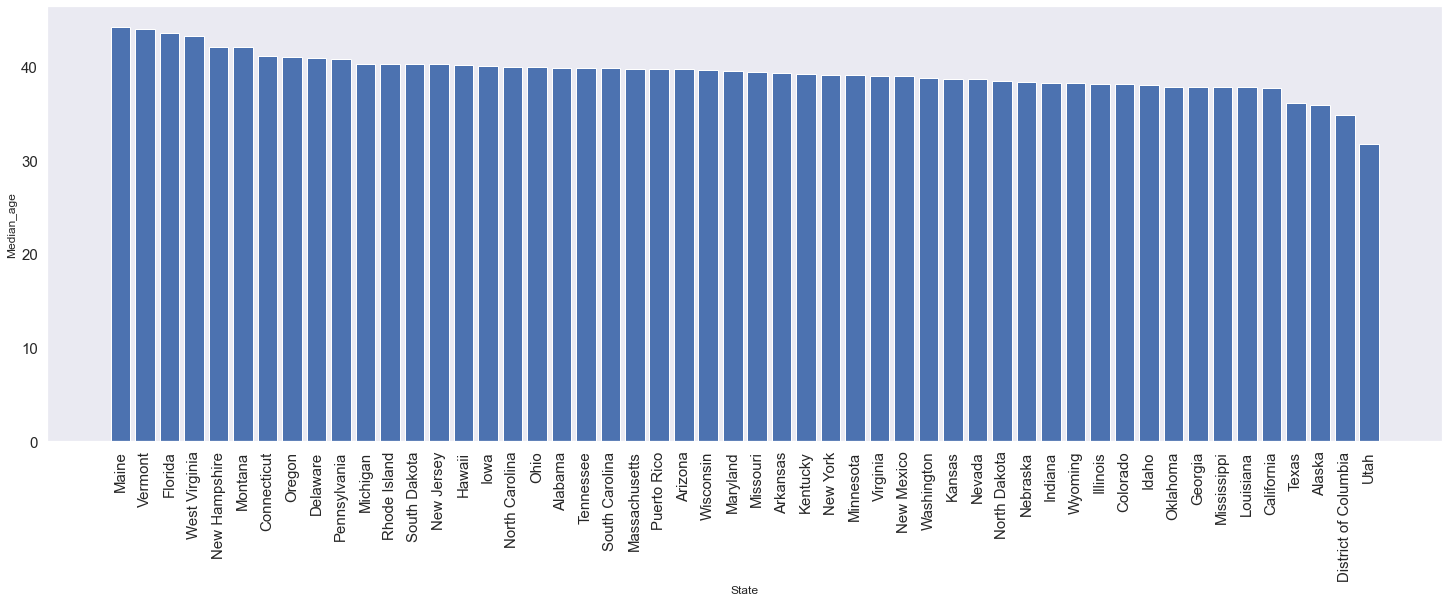

In [68]:
#Plot the barplot for median age
plt.figure(figsize=(25,8))
plt.bar('state','median_age', data=median_age_bar_plot_df)
plt.grid(False)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('State')
plt.ylabel('Median_age')

<AxesSubplot:xlabel='median_age', ylabel='Density'>

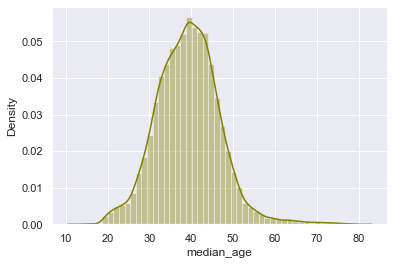

In [69]:
sns.distplot(pop_ed['median_age'], color='olive')

#### Note: From both the plot above for median age we observe,
* The median age is around 40, and the distribution of age is between 20 to 60
* Some of the age distribution is right skewed but very little.
* median age displays gaussian distribution.

<font color='olive'>***6.a)Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.***</font>

<font color='olive'>***6.b)Analyze the married, separated, and divorced population for these population brackets***</font>

<font color='olive'>***6.c)Visualize using appropriate chart typ***e</font>

In [70]:
#Adding 3 more columns of our interest to pop_ed dataframe
pop_ed[['married','separated','divorced']] = df_train[['married','separated','divorced']]

In [71]:
pop_ed.head(3)

state        city     place        ALand   pop  male_pop  \
UID                                                                   
267822  New York    Hamilton  Hamilton  202183361.0  5230      2612   
246444   Indiana  South Bend  Roseland    1560828.0  2633      1349   
245683   Indiana    Danville  Danville   69561595.0  6881      3643   

        female_pop  male_age_median  female_age_median  pop_density  \
UID                                                                   
267822        2618         44.00000           45.33333     0.000026   
246444        1284         32.00000           37.58333     0.001687   
245683        3238         40.83333           42.83333     0.000099   

        median_age  married  separated  divorced  
UID                                               
267822   44.666665  0.57851    0.01240   0.08770  
246444   34.791665  0.34886    0.01426   0.09030  
245683   41.833330  0.64745    0.01607   0.10657

<font color='blue'>***Note:***</font> 
* From the statistical analysis of pop variable, we will create 3 bins specifying 3 categories of population as low, medium, high further analysis.

In [72]:
#Create a pop_bin of 3 different categories as 'LOW','MEDIUM','HIGH' for referencing population
pop_ed['pop_bins'] = pd.cut(pop_ed['pop'], bins=np.linspace(0,55000,4,dtype='int'))
pop_ed['bin_labels'] = pd.cut(pop_ed['pop'], bins = np.linspace(0,55000,4,dtype='int'),labels=['low','medium','high'])
pop_ed.head(3)

state        city     place        ALand   pop  male_pop  \
UID                                                                   
267822  New York    Hamilton  Hamilton  202183361.0  5230      2612   
246444   Indiana  South Bend  Roseland    1560828.0  2633      1349   
245683   Indiana    Danville  Danville   69561595.0  6881      3643   

        female_pop  male_age_median  female_age_median  pop_density  \
UID                                                                   
267822        2618         44.00000           45.33333     0.000026   
246444        1284         32.00000           37.58333     0.001687   
245683        3238         40.83333           42.83333     0.000099   

        median_age  married  separated  divorced    pop_bins bin_labels  
UID                                                                      
267822   44.666665  0.57851    0.01240   0.08770  (0, 18333]        low  
246444   34.791665  0.34886    0.01426   0.09030  (0, 18333]        low  
245683   41.833330  0.64745    0.01607   0.10657  (0, 18333]        low

In [73]:
#Count of records per bin
print('Count of records per bin')
print(pop_ed['pop_bins'].value_counts())

Count of records per bin
(0, 18333]        26995
(18333, 36666]       21
(36666, 55000]        3
Name: pop_bins, dtype: int64


In [74]:
#Grouping the population based on Married Separated and Divorced cat into 3 bins
pop_ed.groupby(by='pop_bins')[['married','separated','divorced']].agg(['mean','median'])

married          separated           divorced         
                    mean   median      mean   median      mean   median
pop_bins                                                               
(0, 18333]      0.509201  0.52720  0.019080  0.01347  0.100419  0.09536
(18333, 36666]  0.640677  0.64111  0.010062  0.00916  0.064891  0.05669
(36666, 55000]  0.633693  0.73474  0.004023  0.00405  0.034577  0.03036

Text(0.5, 1.0, 'Married%')

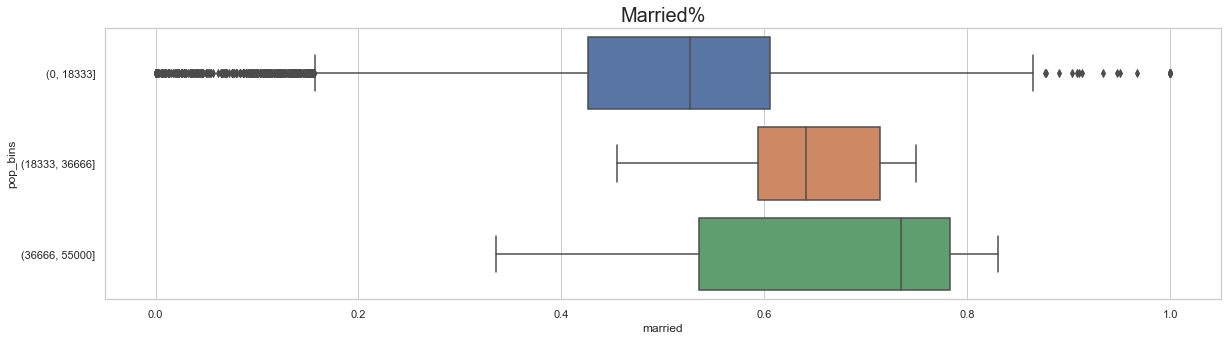

In [75]:
#Plot for married vs respective pop_bins category
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
sns.boxplot(x='married', y='pop_bins', data=pop_ed).set_title('Married%', fontsize=20)

Text(0.5, 1.0, 'Separated%')

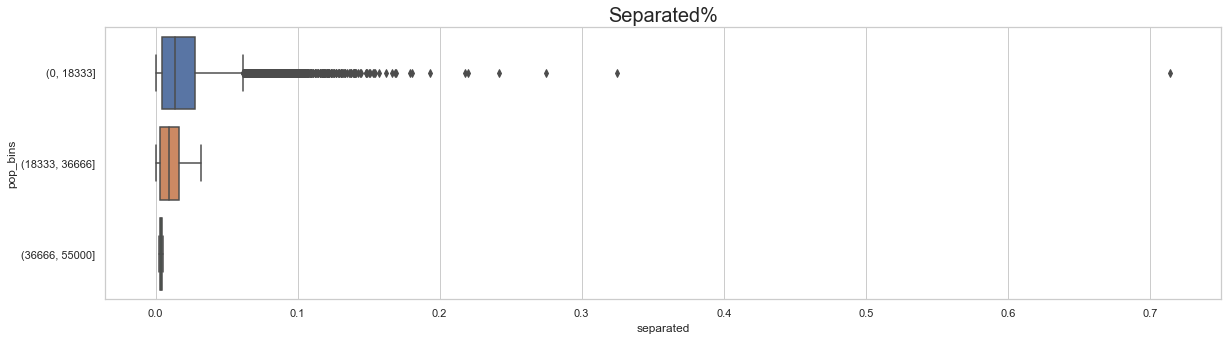

In [76]:
#Plot for separated vs respective pop_bins category
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
sns.boxplot(x='separated', y='pop_bins', data=pop_ed).set_title('Separated%', fontsize=20)

Text(0.5, 1.0, 'Divorced%')

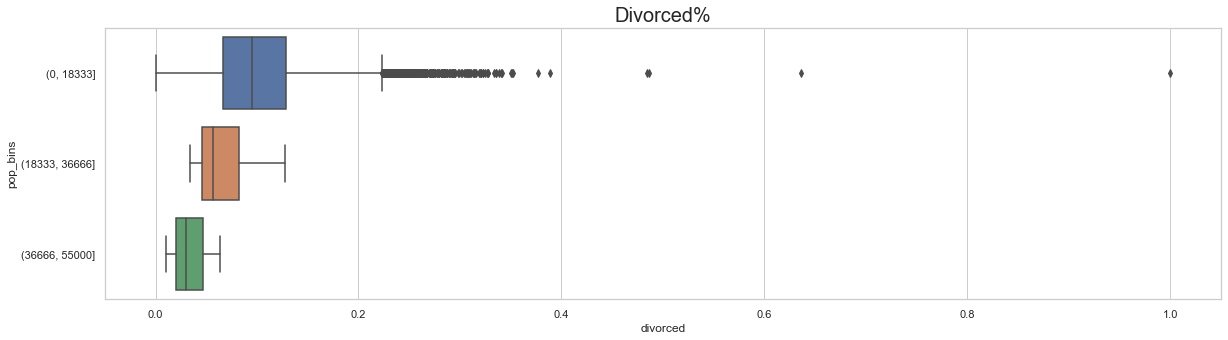

In [77]:
#Plot for divorced vs respective pop_bins category
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
sns.boxplot(x='divorced', y='pop_bins', data=pop_ed).set_title('Divorced%', fontsize=20)

### Note:
* From the above analysis plots we can infer that, large number of cities falls under low population category in the brackets of 0-18333
* High population category has a few cities in it with more average married people as comapred with rest.

### <font color='olive'>**7.Please detail your observations for rent as a percentage of income at an overall level, and for different states**</font>

In [78]:
pop_ed[['rent_median','hi_median']] = df_train[['rent_median','hi_median']]
pop_ed.head(3)

state        city     place        ALand   pop  male_pop  \
UID                                                                   
267822  New York    Hamilton  Hamilton  202183361.0  5230      2612   
246444   Indiana  South Bend  Roseland    1560828.0  2633      1349   
245683   Indiana    Danville  Danville   69561595.0  6881      3643   

        female_pop  male_age_median  female_age_median  pop_density  \
UID                                                                   
267822        2618         44.00000           45.33333     0.000026   
246444        1284         32.00000           37.58333     0.001687   
245683        3238         40.83333           42.83333     0.000099   

        median_age  married  separated  divorced    pop_bins bin_labels  \
UID                                                                       
267822   44.666665  0.57851    0.01240   0.08770  (0, 18333]        low   
246444   34.791665  0.34886    0.01426   0.09030  (0, 18333]        low   
245683   41.833330  0.64745    0.01607   0.10657  (0, 18333]        low   

        rent_median  hi_median  
UID                             
267822        784.0    48120.0  
246444        848.0    35186.0  
245683        703.0    74964.0

In [79]:
#Overall level of rent as a percentage of income
pop_ed['rent_pct_inc'] = (df_train['rent_median'] / df_train['hi_median']) *100
pop_ed.head(3)

state        city     place        ALand   pop  male_pop  \
UID                                                                   
267822  New York    Hamilton  Hamilton  202183361.0  5230      2612   
246444   Indiana  South Bend  Roseland    1560828.0  2633      1349   
245683   Indiana    Danville  Danville   69561595.0  6881      3643   

        female_pop  male_age_median  female_age_median  pop_density  \
UID                                                                   
267822        2618         44.00000           45.33333     0.000026   
246444        1284         32.00000           37.58333     0.001687   
245683        3238         40.83333           42.83333     0.000099   

        median_age  married  separated  divorced    pop_bins bin_labels  \
UID                                                                       
267822   44.666665  0.57851    0.01240   0.08770  (0, 18333]        low   
246444   34.791665  0.34886    0.01426   0.09030  (0, 18333]        low   
245683   41.833330  0.64745    0.01607   0.10657  (0, 18333]        low   

        rent_median  hi_median  rent_pct_inc  
UID                                           
267822        784.0    48120.0      1.629260  
246444        848.0    35186.0      2.410049  
245683        703.0    74964.0      0.937783

<font color='blue'>**Let's visualize the median household income of states**</font>

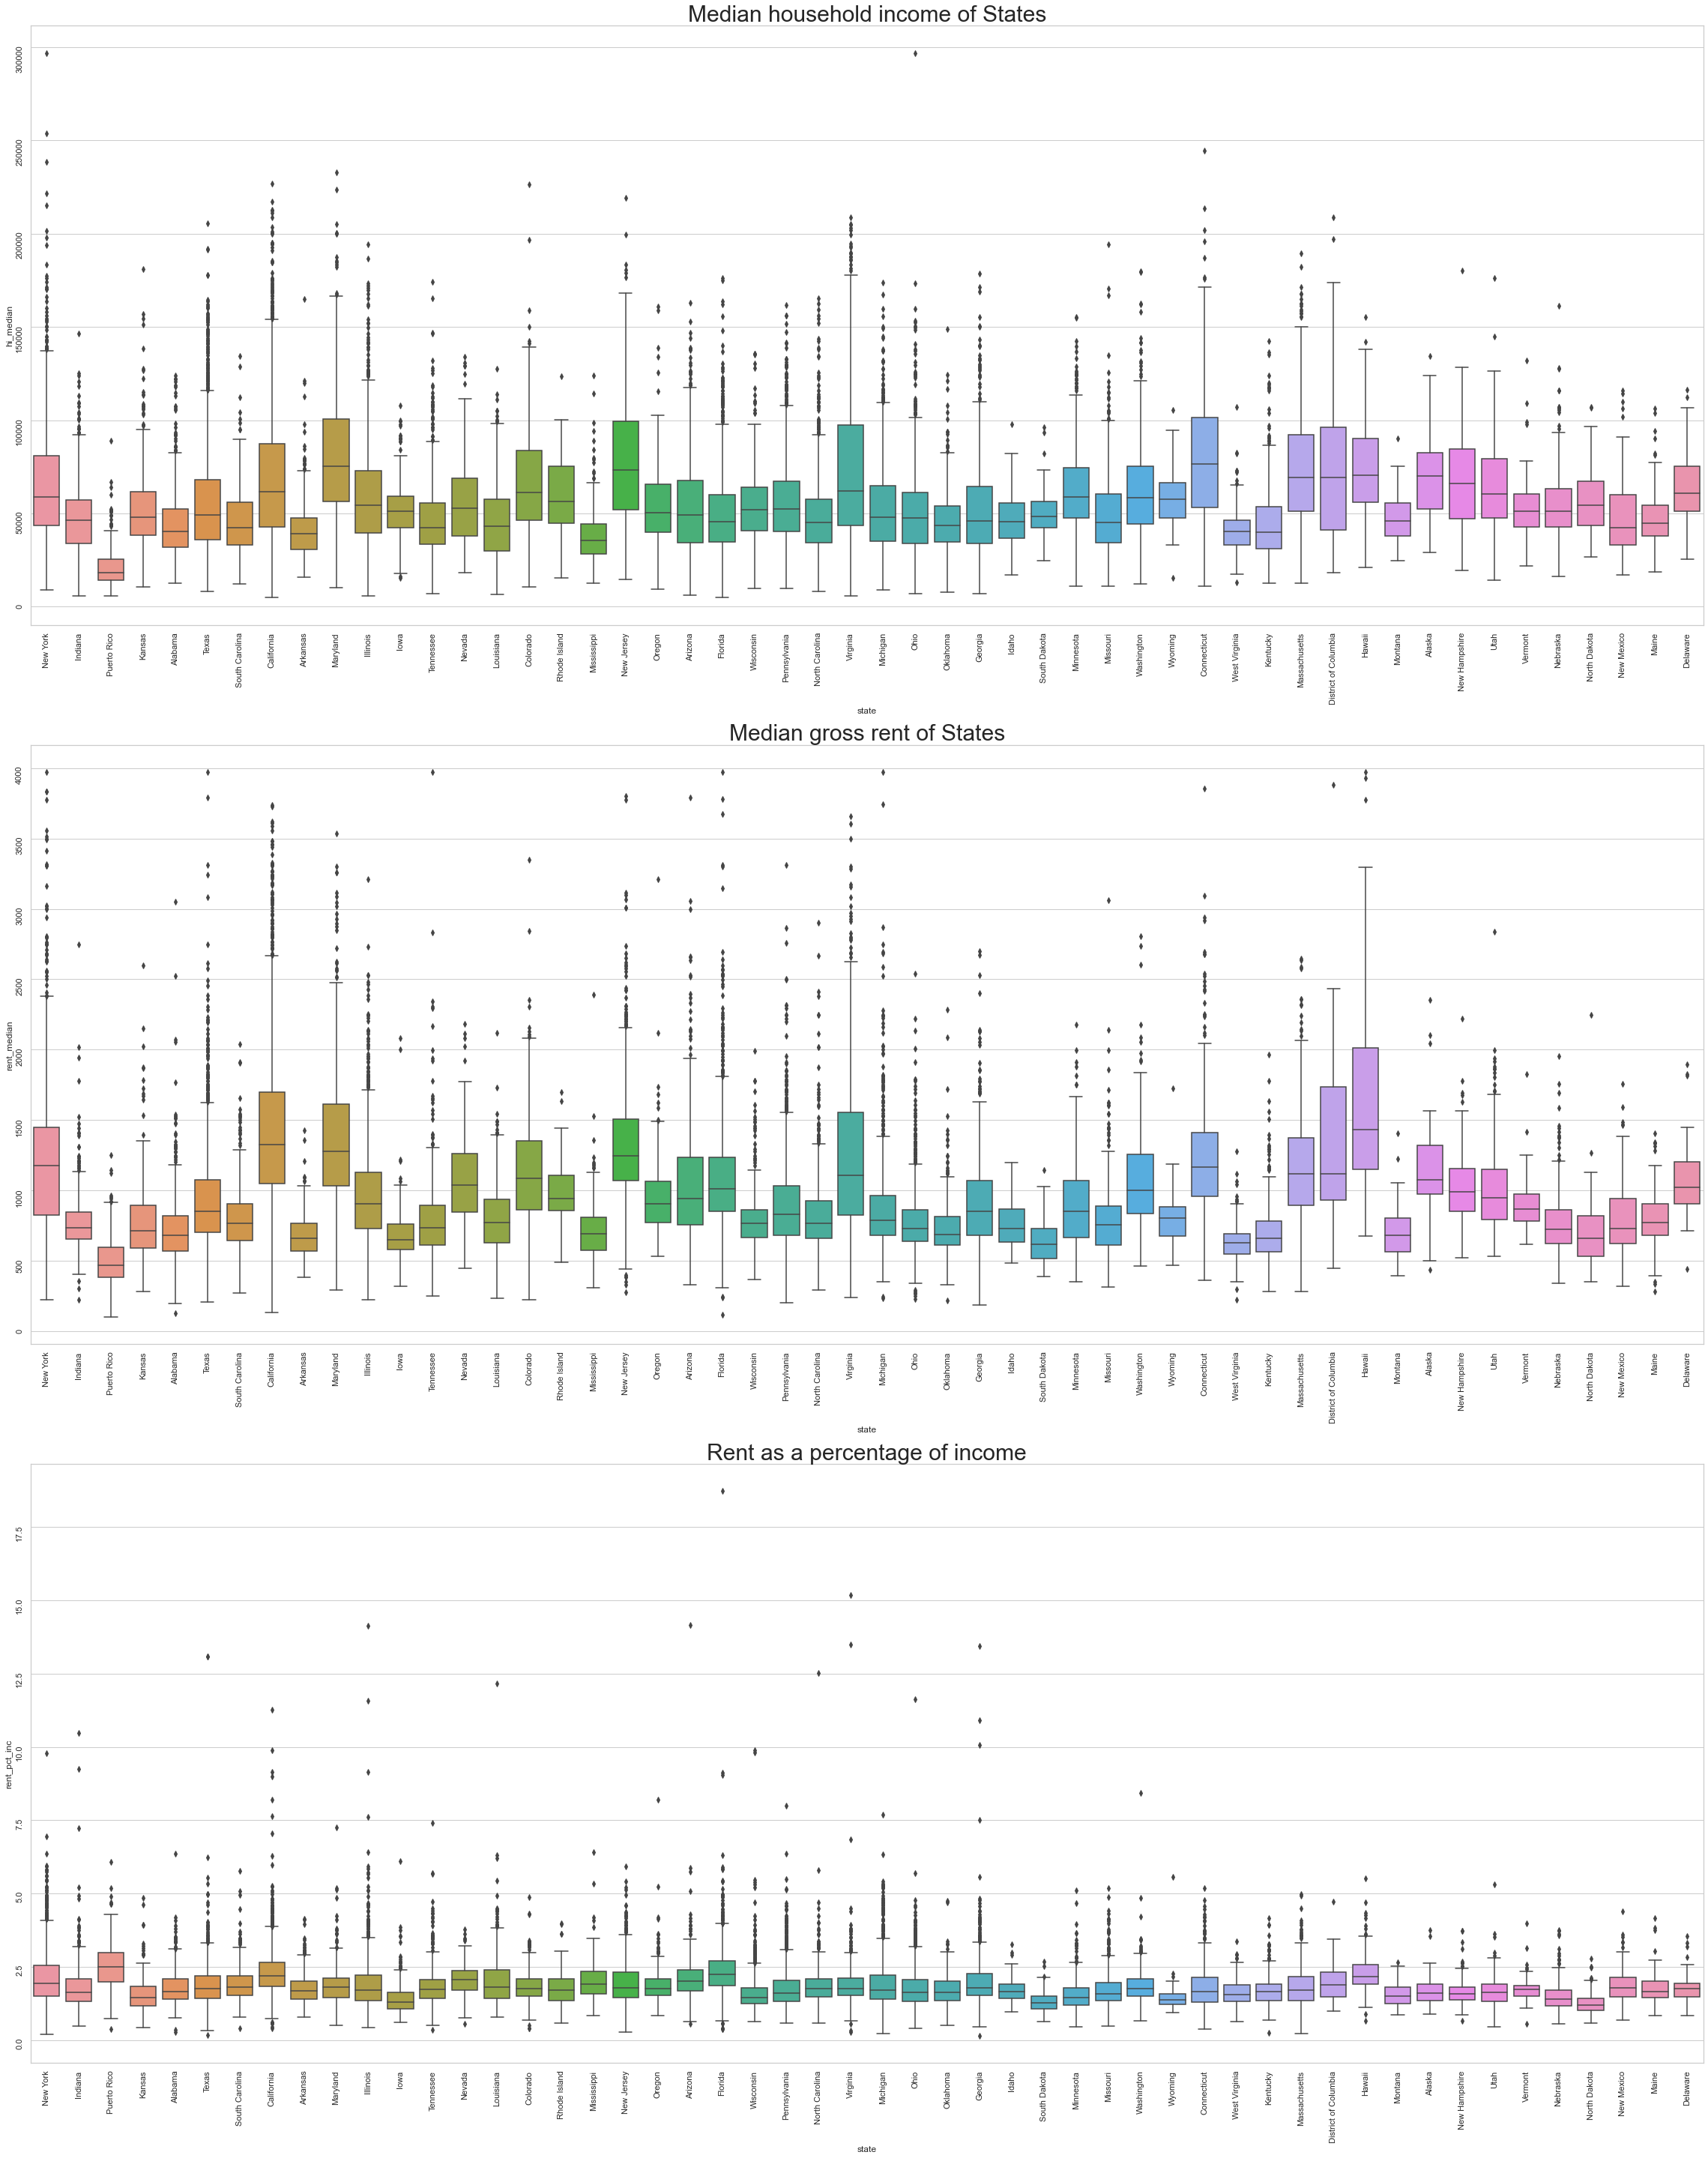

In [80]:
f, a = plt.subplots(3,1, figsize = (40,50))

sns.boxplot(x=pop_ed['state'], y=pop_ed['hi_median'], data=pop_ed, ax=a[0])
a[0].set_title('Median household income of States', fontsize=30)
a[0].tick_params(labelrotation=90)

sns.boxplot(x=pop_ed['state'], y=pop_ed['rent_median'], data=pop_ed, ax=a[1])
a[1].set_title('Median gross rent of States', fontsize=30)
a[1].tick_params(labelrotation=90)

sns.boxplot(x=pop_ed['state'], y=pop_ed['rent_pct_inc'], data=pop_ed, ax=a[2])
a[2].set_title('Rent as a percentage of income', fontsize=30)
a[2].tick_params(labelrotation=90)

**Note:From the above distribution of state wise rent percentage income by household and rent income, we see states like Florida,Virginia,Georgia and Texas etc...have more rent pct income.**

### <font color='olive'>8.Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.</font>

#### NOTE: 
* Before performing the correlation anlalysis, let's call for feature engineering on train and test dataframes respectively. 
* Since we started with 80 features, many of these will be not of much guidance on choosing the optimal markets to enter. So try locating the best possible features by feature engineering.
* During the analysis performed above and as stated in the problem, we came to know that the features, {second_mortgage,home_equity,debt,median_age,population_density,household income,family income} are all important. As we are looking for debt markets (real eastate and mortgage backed securities) with high participation, the pct_own feature lets us know the participation in the market.

In [81]:
df_train['bad_debt'] = df_train['second_mortgage'] + df_train['home_equity'] - df_train['home_equity_second_mortgage']
df_train['good_debt'] = df_train['debt'] - df_train['bad_debt']
df_train['population_density'] = df_train['pop'] / df_train['ALand']
df_train['median_age'] = (df_train['male_age_median'] + df_train['female_age_median']) / 2
df_train['remaining_income'] = df_train['family_median'] - df_train['hi_median']
df_train['rent_pct_inc'] = (df_train['rent_median'] / df_train['hi_median']) * 100

In [82]:
df_test['bad_debt'] = df_test['second_mortgage'] + df_test['home_equity'] - df_test['home_equity_second_mortgage']
df_test['good_debt'] = df_test['debt'] - df_test['bad_debt']
df_test['population_density'] = df_test['pop'] / df_test['ALand']
df_test['median_age'] = (df_test['male_age_median'] + df_test['female_age_median']) / 2
df_test['remaining_income'] = df_test['family_median'] - df_test['hi_median']
df_test['rent_pct_inc'] = (df_test['rent_median'] / df_test['hi_median']) * 100

In [83]:
#Let's prepare the data by dropping the columns that may not be useful for our analysis
df_train.columns
cols_to_drop = ['state', 'state_ab', 'city', 'place', 'type','zip_code','ALand','area_code','AWater','rent_sample_weight', 
                'rent_samples' , 'rent_gt_10', 'rent_gt_15','rent_gt_20',  'rent_gt_25', 'rent_gt_30', 
       'rent_gt_35', 'rent_gt_40','rent_gt_50', 'hi_mean','hi_stdev','family_mean','family_stdev', 'hc_mortgage_stdev',
        'hc_mortgage_sample_weight','hc_mortgage_samples', 'debt_cdf','male_age_mean','male_age_stdev', 'female_age_mean',
        'female_age_stdev','female_age_sample_weight','female_age_samples','hc_stdev','hs_degree_male',
        'hs_degree_female','second_mortgage_cdf','rent_stdev','rent_mean','male_age_sample_weight',
        'male_age_samples','family_samples','home_equity_cdf', 'hi_samples','used_samples', 'hc_samples',
        'hi_sample_weight', 'family_sample_weight','hc_sample_weight','male_pop','female_pop','hc_mean']

In [84]:
train = df_train
test = df_test

In [85]:
train = train.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)

In [86]:
#Print the shape of both train and test dataframes after dropping the columns
print('Train data shape: ',train.shape)
print('Test data shape: ',test.shape)

Train data shape:  (27161, 30)
Test data shape:  (11677, 30)


In [87]:
train.head(3)

COUNTYID  STATEID        lat        lng   pop  rent_median  \
UID                                                                  
267822        53       36  42.840812 -75.501524  5230        784.0   
246444       141       18  41.701441 -86.266614  2633        848.0   
245683        63       18  39.792202 -86.515246  6881        703.0   

        universe_samples  hi_median  family_median  hc_mortgage_mean  ...  \
UID                                                                   ...   
267822               387    48120.0        53245.0        1414.80295  ...   
246444               542    35186.0        43023.0         864.41390  ...   
245683               459    74964.0        85395.0        1506.06758  ...   

        married  married_snp  separated  divorced  bad_debt  good_debt  \
UID                                                                      
267822  0.57851      0.01882    0.01240   0.08770   0.09408    0.43555   
246444  0.34886      0.01426    0.01426   0.09030   0.04274    0.56581   
245683  0.64745      0.02830    0.01607   0.10657   0.09512    0.63972   

        population_density  median_age  remaining_income  rent_pct_inc  
UID                                                                     
267822            0.000026   44.666665            5125.0      1.629260  
246444            0.001687   34.791665            7837.0      2.410049  
245683            0.000099   41.833330           10431.0      0.937783  

[3 rows x 30 columns]

In [88]:
test.head()

COUNTYID  STATEID        lat        lng   pop  rent_median  \
UID                                                                  
255504       163       26  42.346422 -83.252823  3417        859.0   
252676         1       23  44.100724 -70.257832  3796        750.0   
276314        15       42  41.948556 -76.783808  3944        755.0   
248614       231       21  36.746009 -84.766870  2508        385.0   
286865       355       48  27.882461 -97.678586  6230        997.0   

        universe_samples  hi_median  family_median  hc_mortgage_mean  ...  \
UID                                                                   ...   
255504               435    38746.0        45167.0        1139.24548  ...   
252676               275    61008.0        74759.0        1533.25988  ...   
276314               245    51648.0        57186.0        1254.54462  ...   
248614               153    31612.0        34687.0         862.65763  ...   
286865               660    94211.0       103898.0        1996.41425  ...   

        married  married_snp  separated  divorced  bad_debt  good_debt  \
UID                                                                      
255504  0.28217      0.05910    0.03813   0.14299   0.07651    0.55973   
252676  0.64221      0.02338    0.00000   0.13377   0.14375    0.50380   
276314  0.59961      0.01746    0.01358   0.10026   0.06744    0.38651   
248614  0.56953      0.05492    0.04694   0.12489   0.01741    0.40174   
286865  0.57620      0.01726    0.00588   0.16379   0.03440    0.59748   

        population_density  median_age  remaining_income  rent_pct_inc  
UID                                                                     
255504            0.001260   30.791665            6421.0      2.217003  
252676            0.000257   46.375000           13751.0      1.229347  
276314            0.000015   43.208335            5538.0      1.461818  
248614            0.000005   45.500000            3075.0      1.217892  
286865            0.000452   43.208335            9687.0      1.058263  

[5 rows x 30 columns]

<font color='olive'>***8. Correlation analysis of all the relevant variables and findings from thereon***</font>

<AxesSubplot:>

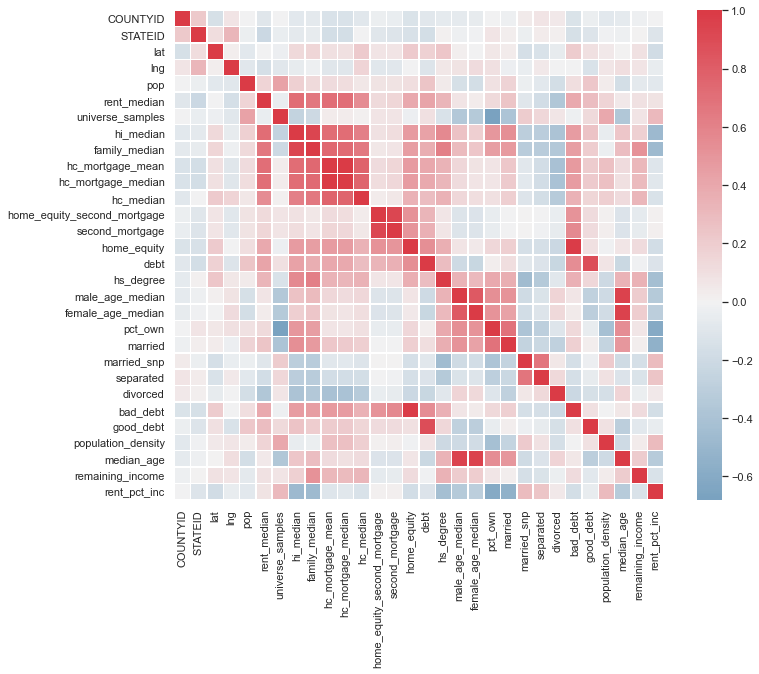

In [89]:
#Compute the correlation matrix
corr = train.corr()

sns.set_theme(style='whitegrid', palette='deep')
f,ax = plt.subplots(figsize=(12,9))
cmap = sns.diverging_palette(240,10, as_cmap=True)

#Draw the heatmap
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=0.5)

### Note:
* rent_median and hc_mortgage_mean,hc_mortgage_median and hc_median has a strong positive correlation
* population_density and remaining_income are positively correlated with target variable hc_mortgage_mean
* home_equity,debt,hs_degree share a good correlation with target variable
* hs_degree shares a good correlation with family_median and hi_median, reflects the effect of high school degree on income brackets of households and families.
* pct_own shares a significantly positive correlation with median_age, married.

### Project Task: Week 2

<font color='olive'>***Data Pre-processing:***</font>
* 1.The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 

* 2.Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data. 

* 3.Following are the list of latent variables:

 a. Highschool graduation rates

 b. Median population age

 c. Second mortgage statistics

 d. Percent own

 e. Bad debt expense

###### Adequacy test to evaluate the 'factorability' of a dataset using KMO(Kaiser-Meyer-Olkin Test) and Bartlett's Sphericity Test

In [90]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(train)
chi_square_value, p_value

(4493270.762566211, 0.0)

In [91]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(train)
kmo_model

0.5121229117346218

#### Note:
* ***Bartlett test is significance***: as p-value is less than some significance level(alpha = 0.05) we can reject null hypothesis stating there variables are orthogonal i.e not correlated, and correlation matrix is an identity matrix. But we assert the alternate hypothesis that variables are correlated enough to where the correlation matrix diverges significantly from the identity matrix.
* ***KMO score*** > 0.5 is sampling adequecy test is acceptable enough for factorability of dataset.

#### Exploratory factor analysis
 ***Note***: 
* Number Of Factors:First, let us quickly run a preliminary factor analysis.  This step is to aid the decision about the number of factors used in a solution.  In this step, we get the eigenvalues of our initial solution, and plot them on a scree plot.  We can find the number of generated factors vs. the eigenvalues.  Eigenvalues that are greater than or equal to 1 should be considered when choosing the number of factors.  A factor with an eigenvalue of 1 accounts for at least the variance of a single feature.  The highly subjective elbow method can also be used.  Our scree plot suggests four or five factors.  

In [92]:
from factor_analyzer import FactorAnalyzer
#FacotrAnalyzer class which fits a factor analysis model
#create a structure of the model, n_factos = 10 chosen as correlation map reflects there are nearly around 8-10 latent variables
fa = FactorAnalyzer(12)
fa.fit_transform(train)

array([[-0.42133917,  0.3467476 ,  0.65511213, ...,  0.61939423,
        -0.34533389, -0.4086279 ],
       [-0.90709215, -0.41279318, -0.81204826, ...,  0.21444625,
         0.2622431 ,  0.6971074 ],
       [ 0.10597302,  1.23030405,  0.18579733, ...,  0.11088106,
        -0.48743995,  0.2479276 ],
       ...,
       [ 0.16807569,  0.98060355,  0.47036673, ..., -0.67753879,
        -0.43779824, -0.05295963],
       [ 2.9263628 ,  2.15520781,  0.4150439 , ...,  0.90367495,
         1.15034988,  0.47756968],
       [-0.53710223, -1.09859541, -1.10468579, ..., -0.69223836,
        -0.65269688,  0.47196283]])

In [93]:
#Factor loadings:correlation coefficient for the variable and factor. It shows the variance explained by a variable on a 
# particular factor
fa.loadings_

array([[-4.21449463e-03,  3.32327053e-02, -7.38461201e-02,
        -5.61988182e-02, -7.34468225e-03,  3.38431472e-02,
         4.36435474e-02,  2.80640888e-02,  1.07753433e-02,
         2.33413474e-01,  1.54964211e-01,  7.19943632e-02],
       [-7.00612858e-03,  5.47109492e-02, -4.91283864e-02,
        -8.33587134e-02, -4.40722406e-02,  1.55127306e-02,
        -5.36117000e-03,  1.91880671e-02, -5.06433159e-02,
         5.74649152e-01, -1.25349776e-01,  1.48571327e-03],
       [ 1.54725682e-02,  4.68265708e-02, -6.80815377e-02,
         5.83805610e-02,  4.90386939e-02,  7.52170450e-03,
        -6.19836592e-02, -9.42871991e-02, -3.59789262e-02,
         7.33693267e-02, -4.59632038e-01,  4.23690914e-02],
       [-5.23439999e-02, -1.22412237e-01,  1.41207670e-01,
         1.40458242e-01,  2.67964883e-02, -5.30861719e-02,
        -1.75520963e-02, -4.28601891e-02,  2.56056665e-02,
         6.30810137e-01, -4.53847743e-02, -8.77769877e-02],
       [-6.78521628e-02,  1.39852115e-01, -3.1446889

#### Note: fa_loadings:- We have 30 columns and as there are 10 factors or latent variables we have recieved 30 rows with 10 columns in factor loadings.

***Compute Eigenvalues:Variance explained by a particular factor out of the total variance***

In [94]:
#Compute eigen values
##We get two eigen values, original eigen values and common factoe eigen values(both numpy array)
ev, v = fa.get_eigenvalues()

### Plot the screeplot

Note: A scree plot is a graphical tool used in the selection of the number of relevant components or factors to be considered in a factor analysis.

Text(0, 0.5, 'Eigen value')

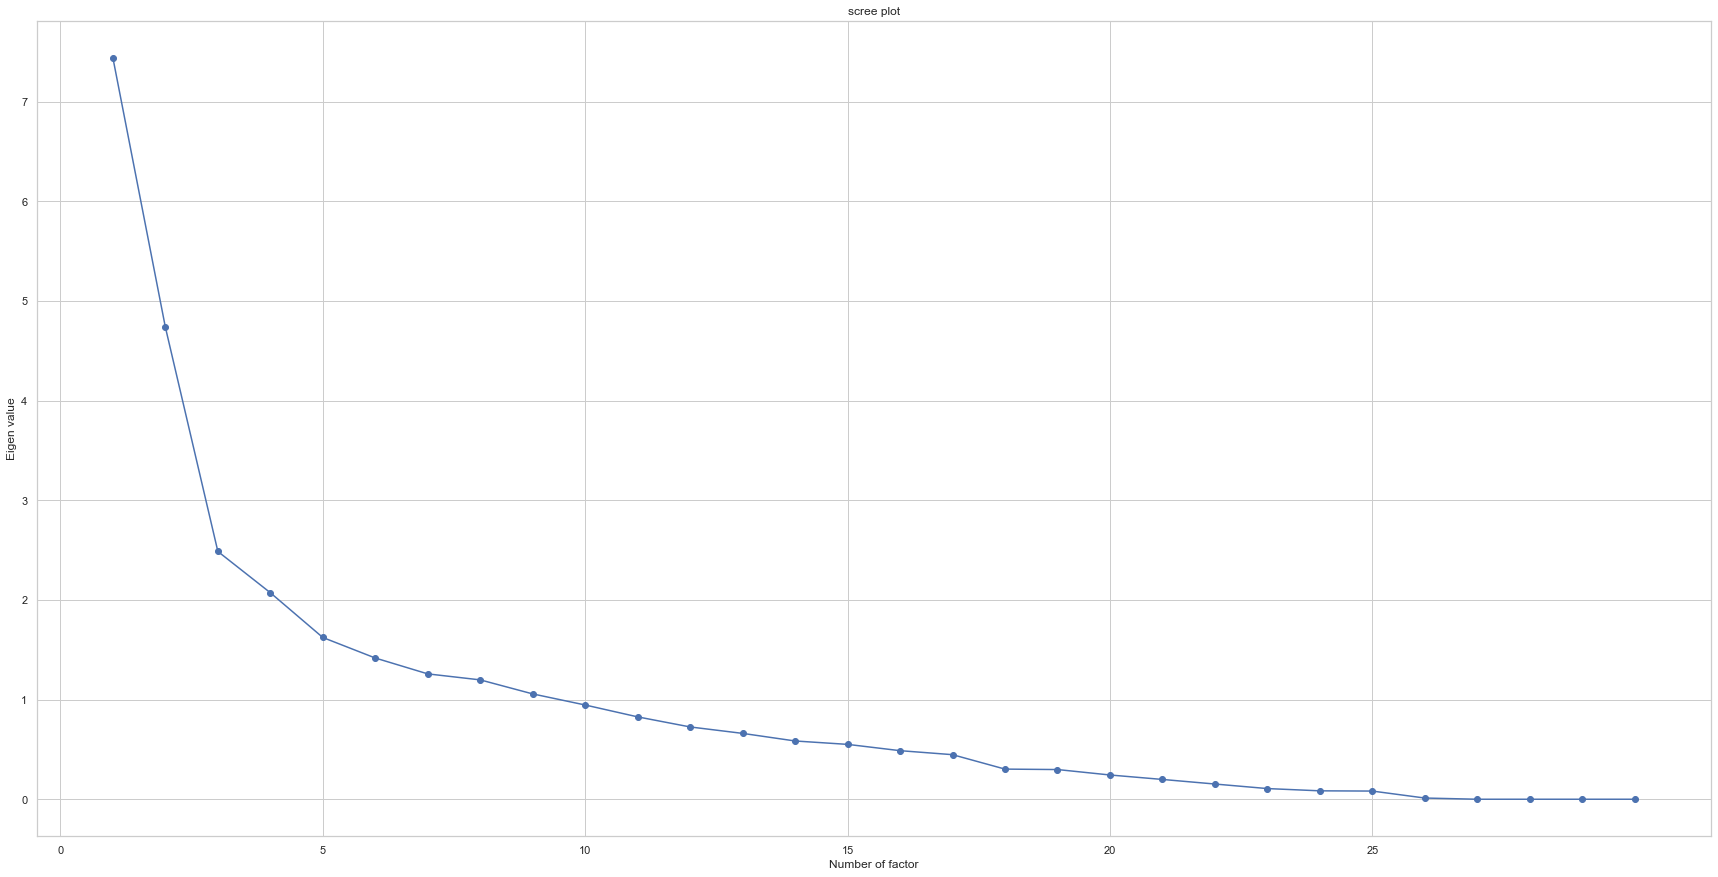

In [95]:
plt.figure(figsize = (30,15))
plt.plot(range(1, train.shape[1]+1), ev)
plt.scatter(range(1,train.shape[1]+1),ev)
plt.xticks(np.arange(0, 30, step=5))
plt.title('scree plot')
plt.xlabel('Number of factor')
plt.ylabel('Eigen value')

### Note: Based on the above scree plot let us choose 10 factors as elbow is observed at 10

In [96]:
fa = FactorAnalyzer(10)
fa.fit_transform(train)

array([[-0.33565823,  0.3869216 ,  0.53378497, ..., -0.21686779,
        -0.25903302,  0.76257436],
       [-1.07390651, -0.41128373, -0.73408614, ...,  0.29613927,
        -0.71463811,  0.03014929],
       [ 0.06209419,  1.25895429,  0.17235358, ...,  0.28382301,
         0.46451732,  0.23941858],
       ...,
       [ 0.19733145,  1.02010589,  0.41995186, ...,  0.0899162 ,
        -0.16236864, -0.47052157],
       [ 2.88100715,  2.13598451,  0.64841466, ...,  0.72028183,
         0.58365107,  0.36630914],
       [-0.66881438, -1.20036041, -0.95612578, ...,  0.43608228,
        -0.17933393, -0.54208683]])

In [97]:
#Get the communalities given the factor loading matrix(This is the proportion of each variable's variance that can be 
#explained by the factors)
fa.get_communalities()

array([0.05990814, 0.34572295, 0.09708402, 0.39408818, 0.52051171,
       0.65992247, 1.13940609, 0.70712896, 0.89699437, 0.93392938,
       0.94698688, 0.73440874, 0.84282818, 0.92746483, 1.18814831,
       0.88714942, 0.27435254, 0.79846686, 0.80366161, 0.71186606,
       0.58564345, 1.00164328, 0.64312955, 0.40970822, 1.17873786,
       1.41656781, 0.53042012, 0.98711095, 0.49972979, 0.52301739])

In [98]:
n=10
loadings = pd.DataFrame(fa.loadings_)
loadings.set_index(train.columns, drop=True, inplace=True)
for i in range(n):
    s = 'Factor ' + str(i+1)
    loadings.rename(columns={i:s}, inplace=True)

In [99]:
loadings

Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
COUNTYID                    -0.037703  0.091699 -0.076285 -0.122037 -0.019819   
STATEID                     -0.033969  0.046948 -0.030169 -0.082721 -0.027466   
lat                         -0.031021 -0.014550 -0.048588  0.168048  0.107230   
lng                         -0.001389 -0.094435  0.135767  0.108005 -0.022812   
pop                         -0.000879  0.106964 -0.032316  0.070714  0.036614   
rent_median                  0.772359 -0.053118  0.016058 -0.030116  0.085897   
universe_samples            -0.193805 -0.638566  0.021486  0.047116  0.001866   
hi_median                    0.707507  0.424567 -0.047243  0.025661  0.057651   
family_median                0.678728  0.378445 -0.086670 -0.040069 -0.018739   
hc_mortgage_mean             0.927153 -0.187134  0.059967  0.023763 -0.020683   
hc_mortgage_median           0.934071 -0.192141  0.041087  0.014814 -0.018284   
hc_median                    0.776403 -0.188338  0.069615 -0.009991  0.021421   
home_equity_second_mortgage  0.004493 -0.046721  0.028215  0.082718  0.017006   
second_mortgage              0.041901 -0.067511  0.039067  0.072063  0.010588   
home_equity                  0.038601  0.126222 -0.062339  1.059357 -0.131791   
debt                         0.033684  0.047707 -0.052248  0.207908  0.892327   
hs_degree                    0.077556  0.271222  0.101967  0.076216  0.108426   
male_age_median             -0.009423  0.174587  0.871769 -0.052581 -0.025034   
female_age_median           -0.051647  0.122733  0.882547 -0.031972 -0.035975   
pct_own                      0.059777  0.778340  0.231577  0.012668  0.002747   
married                      0.210621  0.609760  0.304947  0.020428  0.007251   
married_snp                  0.102584 -0.051743  0.015432  0.100179  0.060625   
separated                   -0.056046 -0.016890  0.038703  0.098591  0.060148   
divorced                    -0.542584 -0.071174  0.215940 -0.062771  0.056014   
bad_debt                     0.047374  0.113940 -0.059261  1.054129 -0.133990   
good_debt                    0.014340 -0.005716 -0.029060 -0.328790  1.130445   
population_density           0.350107 -0.593337  0.066821 -0.078721  0.046791   
median_age                  -0.041231  0.133823  0.980152 -0.052000 -0.012104   
remaining_income             0.177921 -0.052376  0.015519 -0.065129 -0.134420   
rent_pct_inc                 0.078021 -0.666493 -0.036440 -0.068225 -0.056620   

                             Factor 6  Factor 7  Factor 8  Factor 9  Factor 10  
COUNTYID                     0.046957  0.061754  0.024061  0.020861   0.148122  
STATEID                      0.012370 -0.014993  0.004330  0.024499   0.576941  
lat                         -0.009444 -0.093742  0.117481 -0.071449   0.161329  
lng                         -0.044416  0.007795 -0.067113 -0.048282   0.587946  
pop                         -0.018137 -0.060430 -0.123776  0.694309  -0.017836  
rent_median                  0.032917 -0.030416 -0.070418 -0.031105  -0.209964  
universe_samples            -0.004064  0.005633  0.301533  0.774648  -0.018544  
hi_median                   -0.005825  0.010975  0.117594  0.010812  -0.077408  
family_median                0.000250  0.061764  0.512317 -0.018963  -0.130346  
hc_mortgage_mean             0.028038  0.043839  0.161823 -0.021342  -0.073205  
hc_mortgage_median           0.026737  0.047395  0.160837 -0.032848  -0.073679  
hc_median                   -0.002665  0.009976  0.189831 -0.052713   0.227618  
home_equity_second_mortgage  0.911045 -0.038119 -0.030765 -0.012178  -0.012132  
second_mortgage              0.954205 -0.044377 -0.031100 -0.025102  -0.015658  
home_equity                  0.063727  0.119818 -0.057873  0.073057  -0.011389  
debt                         0.037690  0.100724 -0.156328  0.050093  -0.054967  
hs_degree                    0.003733 -0.175885  0.365666  0.043763  -0.015409  
male_age_median              0.018980  0.037573  0.046572 -

#### Note:
***From the above factor loadings dataframe we can infer the features having strongest loadings. Several factors appears to have weak loadings***
* Factor 10:COUNTYID(0.14),STATEID(0.57),lat(0.16),lng(0.68),
* Factor 9:pop(0.69),universe_samples(0.77)
* Factor 8:hs_degree(0.36),remaining_income(0.66)
* Factor 7: married_snp(0.98), separated(0.78)
* Factor 6: home_equity_second_mortgage(0.91), second_mortgage(0.95)
* Factor 5: debt(0.89), good_debt(1.13)
* Factor 4: home_equity(1.05), bad_debt(1.05)
* Factor 3: male_age_median(0.87),female_age_median(0.88), median_age(0.98)
* Factor 2: pct_own(0.77), married(0.60)
* Factor 1: rent_median(0.77),hi_median(0.77),family_median(0.67),hc_mortgage_mean(0.92),hc_mortgage_median(0.93), population_denssity(0.35)

We observe from above that we can do a naming conventions to the factors based on features that grouped within those factors having high correlation, and choose only those factors with little or no correlation among themselves so as to work with lesser dimensionality in more meaningful way.

### Project task Week 3
### Data Modeling :

<font color='olive'>****Build a linear Regression model to predict the total monthly expenditure for home mortgages loan****</font> 

Please refer deplotment_RE.xlsx. Column hc_mortgage_mean is predicted variable. This is the mean monthly mortgage and owner costs of specified geographical location.

**Note:**

a) Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean. 

b) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

c) Run another model at State level. There are 52 states in USA.

d) Keep below considerations while building a linear regression model:

    * Variables should have significant impact on predicting Monthly mortgage and owner costs

    * Utilize all predictor variable to start with initial hypothesis

    * R square of 60 percent and above should be achieved

    * Ensure Multi-collinearity does not exist in dependent variables

    * Test if predicted variable is normally distributed

In [100]:
feature_cols = ['COUNTYID','STATEID', 'pop', 'rent_median',
        'hi_median', 'family_median', 'hc_median', 'home_equity_second_mortgage',
       'second_mortgage', 'home_equity', 'debt', 'hs_degree',
       'male_age_median', 'female_age_median', 'pct_own', 'married',
       'married_snp', 'separated', 'divorced', 'bad_debt', 'good_debt',
       'population_density', 'median_age', 'remaining_income', 'rent_pct_inc']

In [101]:
#Define train and test dataset
x_train = train[feature_cols]
y_train = train['hc_mortgage_mean']
x_test = test[feature_cols]
y_test = test['hc_mortgage_mean']

In [102]:
#Print the shape of train and test dataset
print('x_train data',x_train.shape)
print('y_train data',y_train.shape)
print('x_test data', x_test.shape)
print('y_test data', y_test.shape)

x_train data (27161, 25)
y_train data (27161,)
x_test data (11677, 25)
y_test data (11677,)


In [103]:
x_train.head()

COUNTYID  STATEID   pop  rent_median  hi_median  family_median  \
UID                                                                      
267822        53       36  5230        784.0    48120.0        53245.0   
246444       141       18  2633        848.0    35186.0        43023.0   
245683        63       18  6881        703.0    74964.0        85395.0   
279653       127       72  2700        782.0    37845.0        44399.0   
247218       161       20  5637        881.0    22497.0        50272.0   

        hc_median  home_equity_second_mortgage  second_mortgage  home_equity  \
UID                                                                            
267822      558.0                      0.01588          0.02077      0.08919   
246444      336.0                      0.02222          0.02222      0.04274   
245683      532.0                      0.00000          0.00000      0.09512   
279653      247.0                      0.01086          0.01086      0.01086   
247218      444.0                      0.05426          0.05426      0.05426   

        ...  married  married_snp  separated  divorced  bad_debt  good_debt  \
UID     ...                                                                   
267822  ...  0.57851      0.01882    0.01240   0.08770   0.09408    0.43555   
246444  ...  0.34886      0.01426    0.01426   0.09030   0.04274    0.56581   
245683  ...  0.64745      0.02830    0.01607   0.10657   0.09512    0.63972   
279653  ...  0.47257      0.02021    0.02021   0.10106   0.01086    0.51628   
247218  ...  0.12356      0.00000    0.00000   0.03109   0.05426    0.46512   

        population_density  median_age  remaining_income  rent_pct_inc  
UID                                                                     
267822            0.000026   44.666665            5125.0      1.629260  
246444            0.001687   34.791665            7837.0      2.410049  
245683            0.000099   41.833330           10431.0      0.937783  
279653            0.002442   49.750000            6554.0      2.066323  
247218            0.002207   22.000000           27775.0      3.916078  

[5 rows x 25 columns]

**Note:Since we have feautres in our dataset whose values vary in terms of scales, we will use standard scaler in order to scale the the data to unit variance with 0 mean**

In [104]:
#instantiate an object of StandardScaler
sc = StandardScaler()
#fit it on the train and test data
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [105]:
#Create a linear regression model
linreg = LinearRegression()
linreg.fit(x_train_scaled, y_train)

LinearRegression()

In [106]:
print('The intercept of the linear model: ',linreg.intercept_)
print('\nThe coefficients of the linear model:\n ',linreg.coef_)

The intercept of the linear model:  1626.5101550399474

The coefficients of the linear model:
  [ -11.54938975  -34.71097518    8.78563245  104.91418171  132.20995604
  124.76203456  211.63205494  -35.83395313   31.50832057   18.04525587
   17.09168225  -52.96105694   43.78501468    2.00283458 -104.5545101
   -6.81599359   20.8149953   -15.05642739  -44.12021729   47.91808299
   -5.80656792   61.71256219   23.73177024   27.23135161    1.59852439]


In [107]:
#predict on test  data
y_pred = linreg.predict(x_test_scaled)

In [108]:
#Evaluate the accuracy metrics for linear regression model created
print('Overall R2 score of linear regression model',r2_score(y_test, y_pred))
print('RMSE of linear regression model', np.sqrt(mean_squared_error(y_test, y_pred)))

Overall R2 score of linear regression model 0.7993488669446899
RMSE of linear regression model 281.39729334792685


In [109]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)
print('Adjusted R-squared value is: ',Adj_r2)

Adjusted R-squared value is:  0.7989183220707406


### Note: 
* **R-squared of 0.78 indicates the 78% of variation in house_mortgage_mean is explained by all the independent variables(used to develope the linear model),which indicates the goodness of fit**
* **Adjusted R-squared value of 0.79 indicates a good fit of regression model,which accounts for the fact the number of paramters used to estimate the model are worthwhile to include.***

### Distribution of a predicted variable

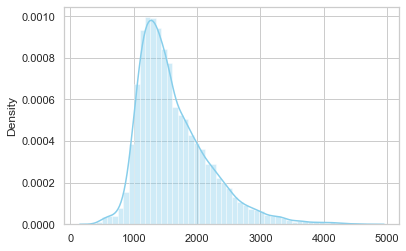

In [110]:
sns.distplot(y_pred, color='skyblue')
plt.show()

### Check the residuals

In [111]:
residuals = y_test - y_pred
residuals

UID
255504     37.287356
252676   -144.018996
276314     97.227943
248614     65.811347
286865     61.476182
             ...    
238088   -348.113640
242811   -156.594352
250127    -33.709114
241096    -98.693532
287763     -5.860342
Name: hc_mortgage_mean, Length: 11677, dtype: float64

### Plot the residuals

#### Test for normality of errors using QQ-plot

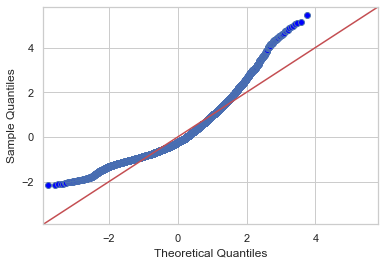

In [113]:
#Plot the normal qq-plot for residuals after fitting the regression line
import statsmodels.api as sm
import scipy.stats as stats
sm.qqplot(y_pred, line='45', fit=True)
plt.show()

**Note:From the above plot we see the theoritical quantiles computed from standard normal distribtuiton and quantiles computed from the sample residuals, i.e standardized residuals nearly fall on the 45 degree line hence we can conclude that the errors in the data come from a standard normal distribution.**

Text(0.5, 1.0, 'Plot of Residuals vs Predicted values')

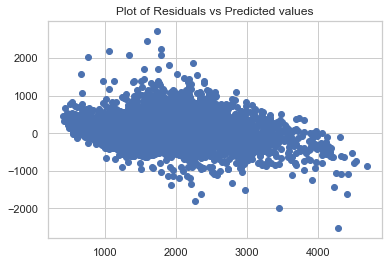

In [114]:
#Residual plot vs.predicted values of target variable
plt.scatter(y_pred,residuals)
plt.title('Plot of Residuals vs Predicted values')

#### Note:
* **The above plots suggests that errors are normally distributed(so the error assumption is true)**
* **The residuals in residual plot doesn't seem to exhibit any specific pattern,the residuals are randomly distributed with variance quiet same(homscedastic assumption), so we can say a linear model for the given dataset is adequate.**

### <font color='blue'>Predicting the total monthly expenditures for home mortgages loan at state level</font>

In [115]:
states = train['STATEID'].unique()
states

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10], dtype=int64)

In [116]:
for i in states:
    print('STATE-ID',i)
    x_train_state = train[train['STATEID']==i][feature_cols]
    y_train_state = train[train['STATEID']==i]['hc_mortgage_mean']
    
    x_test_state = test[test['STATEID']==i][feature_cols]
    y_test_state = test[test['STATEID']==i]['hc_mortgage_mean']
    
    x_train_scaled_state = sc.fit_transform(x_train_state)
    x_test_scaled_state = sc.transform(x_test_state)
    
    linreg.fit(x_train_scaled_state, y_train_state)
    y_pred_state = linreg.predict(x_test_scaled_state)
    
    print('Overall Rsquared score of linear regression model for state,',i,':-' , r2_score(y_test_state, y_pred_state))
    print('Overall RMSE of linear regression model for state,',i,':-',np.sqrt(mean_squared_error(y_test_state, y_pred_state)))
    print('\n')

STATE-ID 36
Overall Rsquared score of linear regression model for state, 36 :- 0.6795955392114517
Overall RMSE of linear regression model for state, 36 :- 437.7740372704195


STATE-ID 18
Overall Rsquared score of linear regression model for state, 18 :- 0.8327236957389178
Overall RMSE of linear regression model for state, 18 :- 110.60073784178489


STATE-ID 72
Overall Rsquared score of linear regression model for state, 72 :- 0.5296054332992218
Overall RMSE of linear regression model for state, 72 :- 217.54879803121443


STATE-ID 20
Overall Rsquared score of linear regression model for state, 20 :- 0.9107876138752496
Overall RMSE of linear regression model for state, 20 :- 121.97583234965349


STATE-ID 1
Overall Rsquared score of linear regression model for state, 1 :- 0.6116903855426896
Overall RMSE of linear regression model for state, 1 :- 190.47072389439234


STATE-ID 48
Overall Rsquared score of linear regression model for state, 48 :- 0.8227132534444066
Overall RMSE of linear reg

### Project 3 : Week 4

### Data Reporting:

Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

Box plot of distribution of average rent by type of place (village, urban, town, etc.).

Pie charts to show overall debt and bad debt.

Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map.

Heat map for correlation matrix.

Pie chart to show the population distribution across different types of places (village, urban, town etc.).

### Tableau Public Dashboard Link
https://public.tableau.com/app/profile/amruta/viz/RealEstate_16556405910430/RealEstateDashboard

### END